# Capstone project_Part2_EDA

## Objectives/ Problem Statement
To predict the price of new HDB launch before the launch 

**why this problem?*
A practical problem that most Singaporeans (including myself) face 


## New Issues arising from EDA

- en bloc potential plays a key role in determining the price performance of freehold and leasehold properties.
(https://www.todayonline.com/business/property/freehold-not-always-better-leasehold)

- the value of leasehold homes depreciate to zero.

lease expiry process: 
- When lease expire, owners have to vacate their property, with no compensation.
- A general policy, the land will return to the State upon lease expiry.

Sers is granted only to HDB blocks on sites with the potential to be redeveloped - where typically the land has not been well utilised. 
Suitable replacement sites for residents must be available. The Government's financial resources also have to be considered.

economic variable 
gdp
income
inflation
interest rate

~~~ 
social variable

marriage 
population 
kids (stop at 2) 
policy

# Load DATA

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime, timedelta
import re

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load DATA ON RESALE

In [84]:
resale_all = pd.read_csv('./datasets/resale_all.csv')
resale_all['date'] = pd.to_datetime(resale_all['month'])

C:\Users\ngyen\Anaconda2python2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
resale_all.head()

,Unnamed: 0,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,full_address,geo_data,latitude,longitude,formatted_address,new full_address,postal_code,date
0,0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,9000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO,309 ANG MO KIO AVE 1,"{""status"": ""OK"", ""results"": [{""geometry"": {""lo...",1.364329,103.84411,"309 Ang Mo Kio Ave 1, Singapore",309 ANG MO KIO AVE 1 Singapore,NaN,1990-01-01
1,0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO,309 ANG MO KIO AVE 1,"{""status"": ""OK"", ""results"": [{""geometry"": {""lo...",1.364329,103.84411,"309 Ang Mo Kio Ave 1, Singapore",309 ANG MO KIO AVE 1 Singapore,NaN,1990-01-01
2,0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,8000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO,309 ANG MO KIO AVE 1,"{""status"": ""OK"", ""results"": [{""geometry"": {""lo...",1.364329,103.84411,"309 Ang Mo Kio Ave 1, Singapore",309 ANG MO KIO AVE 1 Singapore,NaN,1990-01-01
3,0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO,309 ANG MO KIO AVE 1,"{""status"": ""OK"", ""results"": [{""geometry"": {""lo...",1.364329,103.84411,"309 Ang Mo Kio Ave 1, Singapore",309 ANG MO KIO AVE 1 Singapore,NaN,1990-01-01
4,0,309,IMPROVED,1 ROOM,31.0,1977,1990-02,NaN,8000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO,309 ANG MO KIO AVE 1,"{""status"": ""OK"", ""results"": [{""geometry"": {""lo...",1.364329,103.84411,"309 Ang Mo Kio Ave 1, Singapore",309 ANG MO KIO AVE 1 Singapore,NaN,1990-02-01


In [86]:
price_time_all = resale_all.groupby(['date']).mean()[['resale_price']].reset_index()
price_time_all.columns = ['date','mean_resale_price']

In [87]:
resale_all = resale_all.merge(price_time_all,on='date')
resale_all['var_resale_price'] = resale_all['resale_price'] - resale_all['mean_resale_price']

In [2]:
resale = pd.read_csv('./datasets/resale_all.csv')
resale.drop([u'Unnamed: 0',u'geo_data',u'full_address','new full_address'],axis = 1,inplace=True)
resale.head()

C:\Users\ngyen\Anaconda2python2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,latitude,longitude,formatted_address,postal_code
0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,9000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO,1.364329,103.84411,"309 Ang Mo Kio Ave 1, Singapore",NaN
1,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO,1.364329,103.84411,"309 Ang Mo Kio Ave 1, Singapore",NaN
2,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,8000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO,1.364329,103.84411,"309 Ang Mo Kio Ave 1, Singapore",NaN
3,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO,1.364329,103.84411,"309 Ang Mo Kio Ave 1, Singapore",NaN
4,309,IMPROVED,1 ROOM,31.0,1977,1990-02,NaN,8000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO,1.364329,103.84411,"309 Ang Mo Kio Ave 1, Singapore",NaN


In [3]:
resale.columns

Index(['block', 'flat_model', 'flat_type', 'floor_area_sqm',
       'lease_commence_date', 'month', 'remaining_lease', 'resale_price',
       'storey_range', 'street_name', 'town', 'latitude', 'longitude',
       'formatted_address', 'postal_code'],
      dtype='object')

### Time 

In [4]:
resale['date'] = pd.to_datetime(resale['month'])
resale['year'] = resale['date'].apply(lambda x:x.year)
resale['month'] = resale['date'].apply(lambda x:x.month)

In [5]:
resale = resale[resale['year']>2004]

C:\Users\ngyen\Anaconda2python2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


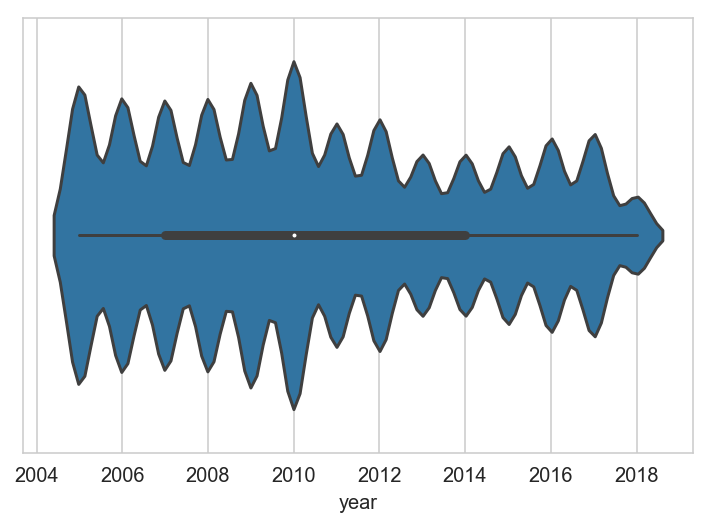

In [6]:
sns.violinplot(resale['year'])

In [7]:
resale['year'].describe()

count    319975.000000
mean       2010.515772
std           3.807862
min        2005.000000
25%        2007.000000
50%        2010.000000
75%        2014.000000
max        2018.000000
Name: year, dtype: float64

In [8]:
price_time = resale.groupby(['date']).mean()[['resale_price']].reset_index()
price_time.columns = ['date','mean_resale_price']
print(price_time.shape)
price_time.head()

(161, 2)


,date,mean_resale_price
0,2005-01-01,234566.718591
1,2005-02-01,239146.119171
2,2005-03-01,235890.113537
3,2005-04-01,236068.993031
4,2005-05-01,233489.878448


In [9]:
resale = resale.merge(price_time,on='date')
resale['var_resale_price'] = resale['resale_price'] - resale['mean_resale_price']

In [10]:
resale['var_resale_price'] = resale['resale_price'] - resale['mean_resale_price']

### lease
- check if remaining_lease = lease_commence_date - year

C:\Users\ngyen\Anaconda2python2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


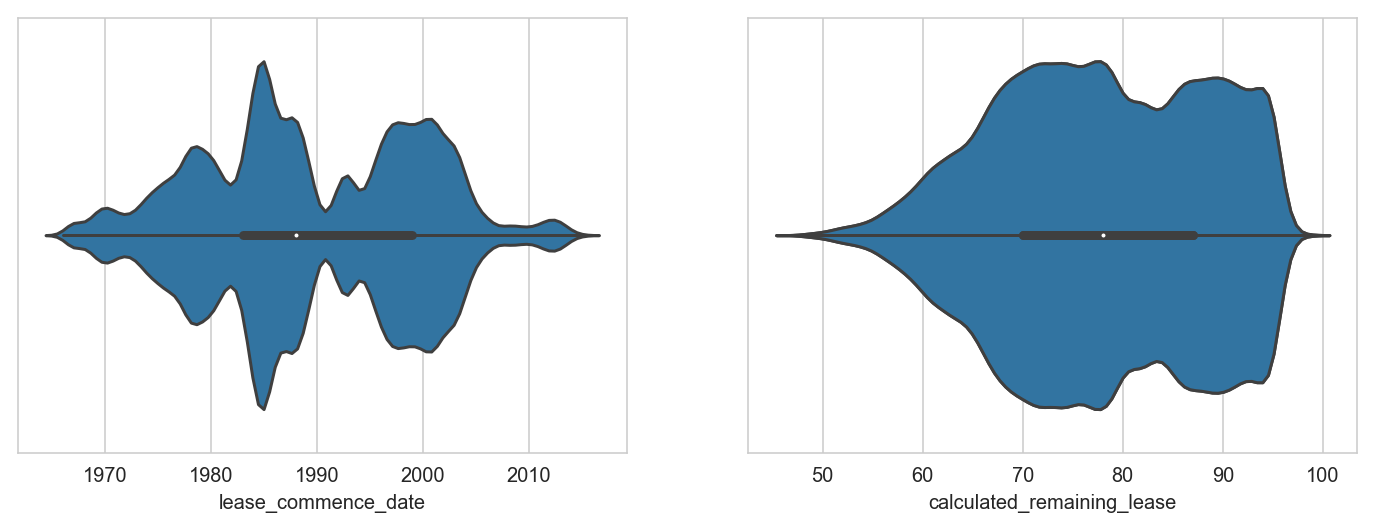

<Figure size 432x288 with 0 Axes>

In [11]:
resale['lease_commence_date'] = resale['lease_commence_date'].astype(int)
resale['calculated_remaining_lease'] = 99 - (resale['year'] - resale['lease_commence_date'])
resale['calculated_remaining_lease'] = [99 if yr >99 else yr for yr in resale['calculated_remaining_lease']]
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
sns.violinplot(resale['lease_commence_date'],ax=ax1)
sns.violinplot(resale['calculated_remaining_lease'],ax=ax2)
plt.figure()
sns.violinplot(resale['calculated_remaining_lease'],ax=ax2)

C:\Users\ngyen\Anaconda2python2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


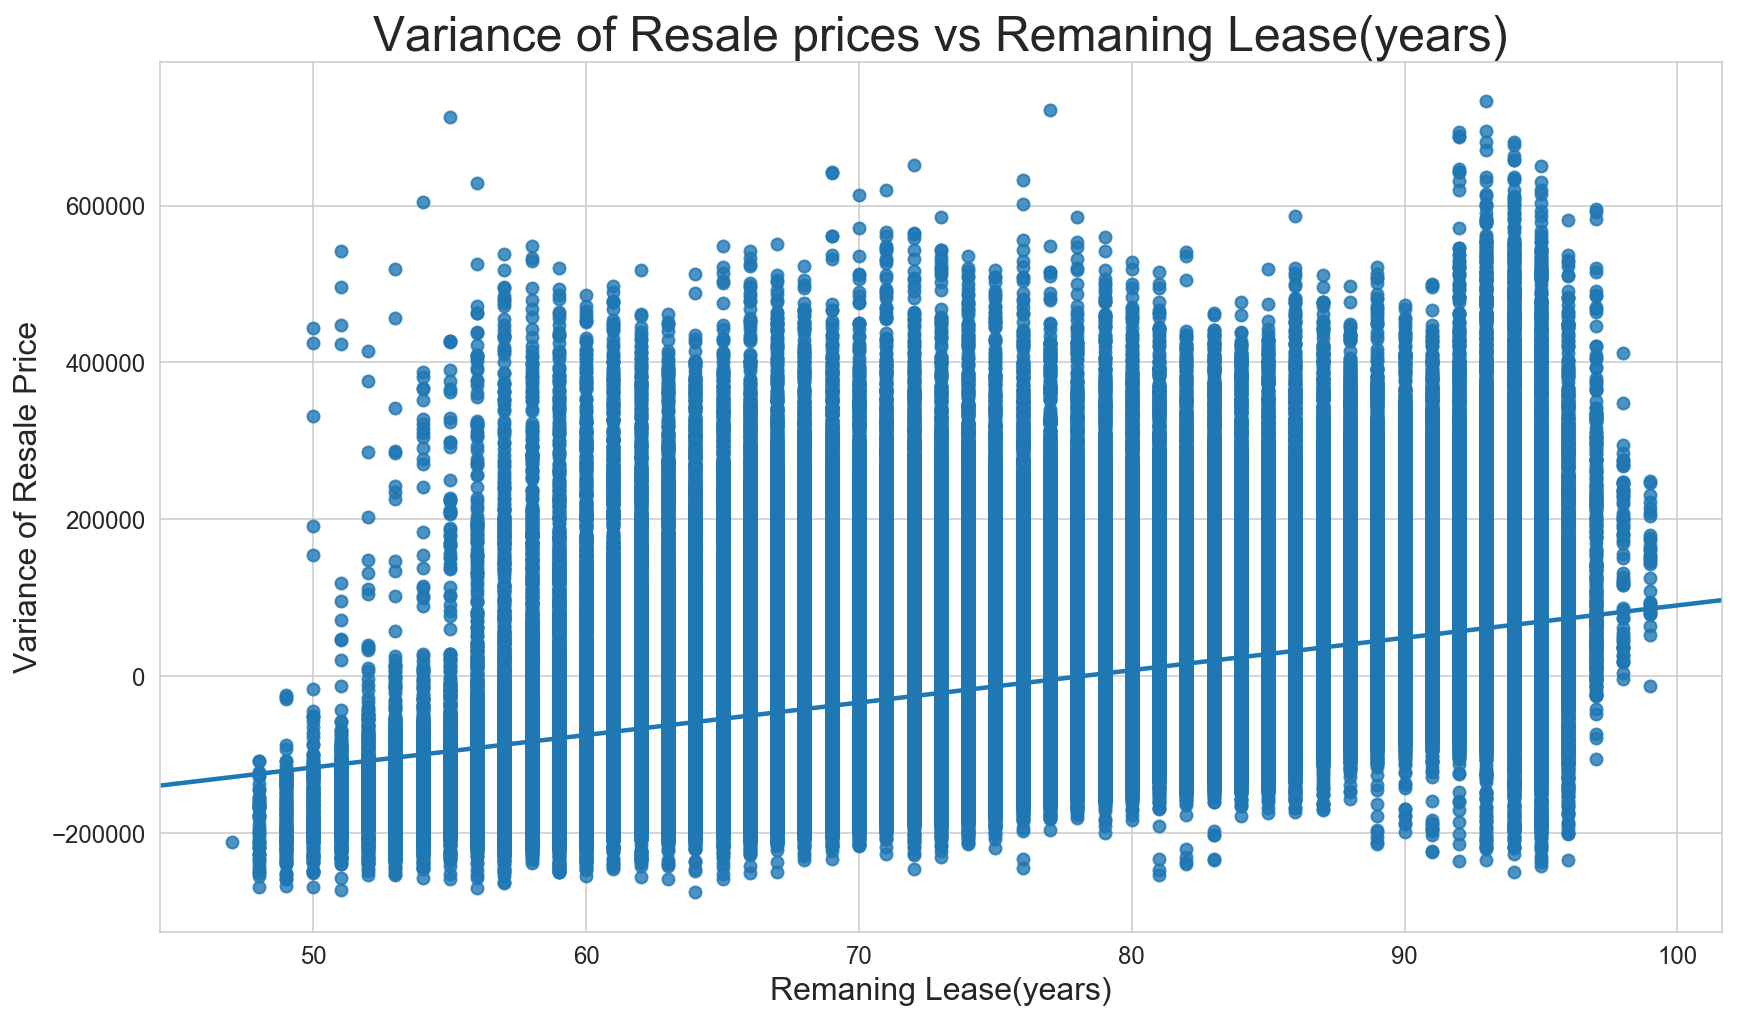

In [12]:
plt.figure(figsize=(14,8))
sns.regplot('calculated_remaining_lease','var_resale_price',resale)

plt.title('Variance of Resale prices vs Remaning Lease(years)',fontsize=24)
plt.xlabel('Remaning Lease(years)',fontsize=16)
plt.ylabel('Variance of Resale Price',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 'block' 
- there are some blocks with Alphabet behind. e.g block 1A 
- the blocks may have a small impact on the value if the owner/buyer is superstitious 
- only keep the numerical value of the block 

In [13]:
resale['block_num'] = [re.findall('\d+',str(block_num))[0] for block_num in resale['block']]
resale['block_num'] = resale['block_num'].astype('int')

### 'flat_model' & 'flat_type
- There is a mix of different uppercase and lower case --> for simplicity, all make to uppercase 

In [14]:
resale['flat_model'] = [model.upper() for model in resale['flat_model']]
resale['flat_model'].value_counts()

MODEL A                   88946
IMPROVED                  87017
NEW GENERATION            56089
PREMIUM APARTMENT         26097
SIMPLIFIED                17329
STANDARD                  13538
APARTMENT                 13362
MAISONETTE                 8935
MODEL A2                   5940
DBSS                        731
ADJOINED FLAT               640
MODEL A-MAISONETTE          584
TERRACE                     259
TYPE S1                     199
MULTI GENERATION            118
TYPE S2                      91
IMPROVED-MAISONETTE          45
PREMIUM MAISONETTE           35
2-ROOM                       11
PREMIUM APARTMENT LOFT        6
PREMIUM APARTMENT.            3
Name: flat_model, dtype: int64

In [15]:
resale['flat_model_PREMIUM'] = [1 if 'PREMIUM' in model else 0 for model in resale['flat_model']]
resale['flat_model_IMPROVED'] = [1 if 'IMPROVED' in model else 0 for model in resale['flat_model']]
resale['flat_model_MODEL_A'] = [1 if 'MODEL A' in model else 0 for model in resale['flat_model']]

In [16]:
resale.replace({'flat_model':{'MODEL A2':'OTHERS',
                              'PREMIUM APARTMENT':'APARTMENT',
                              'PREMIUM APARTMENT.':'APARTMENT',
                              'PREMIUM APARTMENT LOFT':'APARTMENT',
                              'MULTI GENERATION':'OTHERS',
                              '2-ROOM':'OTHERS',
                              'IMPROVED-MAISONETTE':'MAISONETTE',
                              'PREMIUM MAISONETTE':'MAISONETTE',
                              'IMPROVED-MAISONETTE':'MAISONETTE',
                              'MODEL A':'OTHERS',
                              'IMPROVED':'OTHERS',
                              'TYPE S1': 'TYPE S',
                              'TYPE S2': 'TYPE S'
                              }},inplace=True)

resale['flat_model'].value_counts()
#items in others have been captured by other 

OTHERS                182032
NEW GENERATION         56089
APARTMENT              39468
SIMPLIFIED             17329
STANDARD               13538
MAISONETTE              9015
DBSS                     731
ADJOINED FLAT            640
MODEL A-MAISONETTE       584
TYPE S                   290
TERRACE                  259
Name: flat_model, dtype: int64

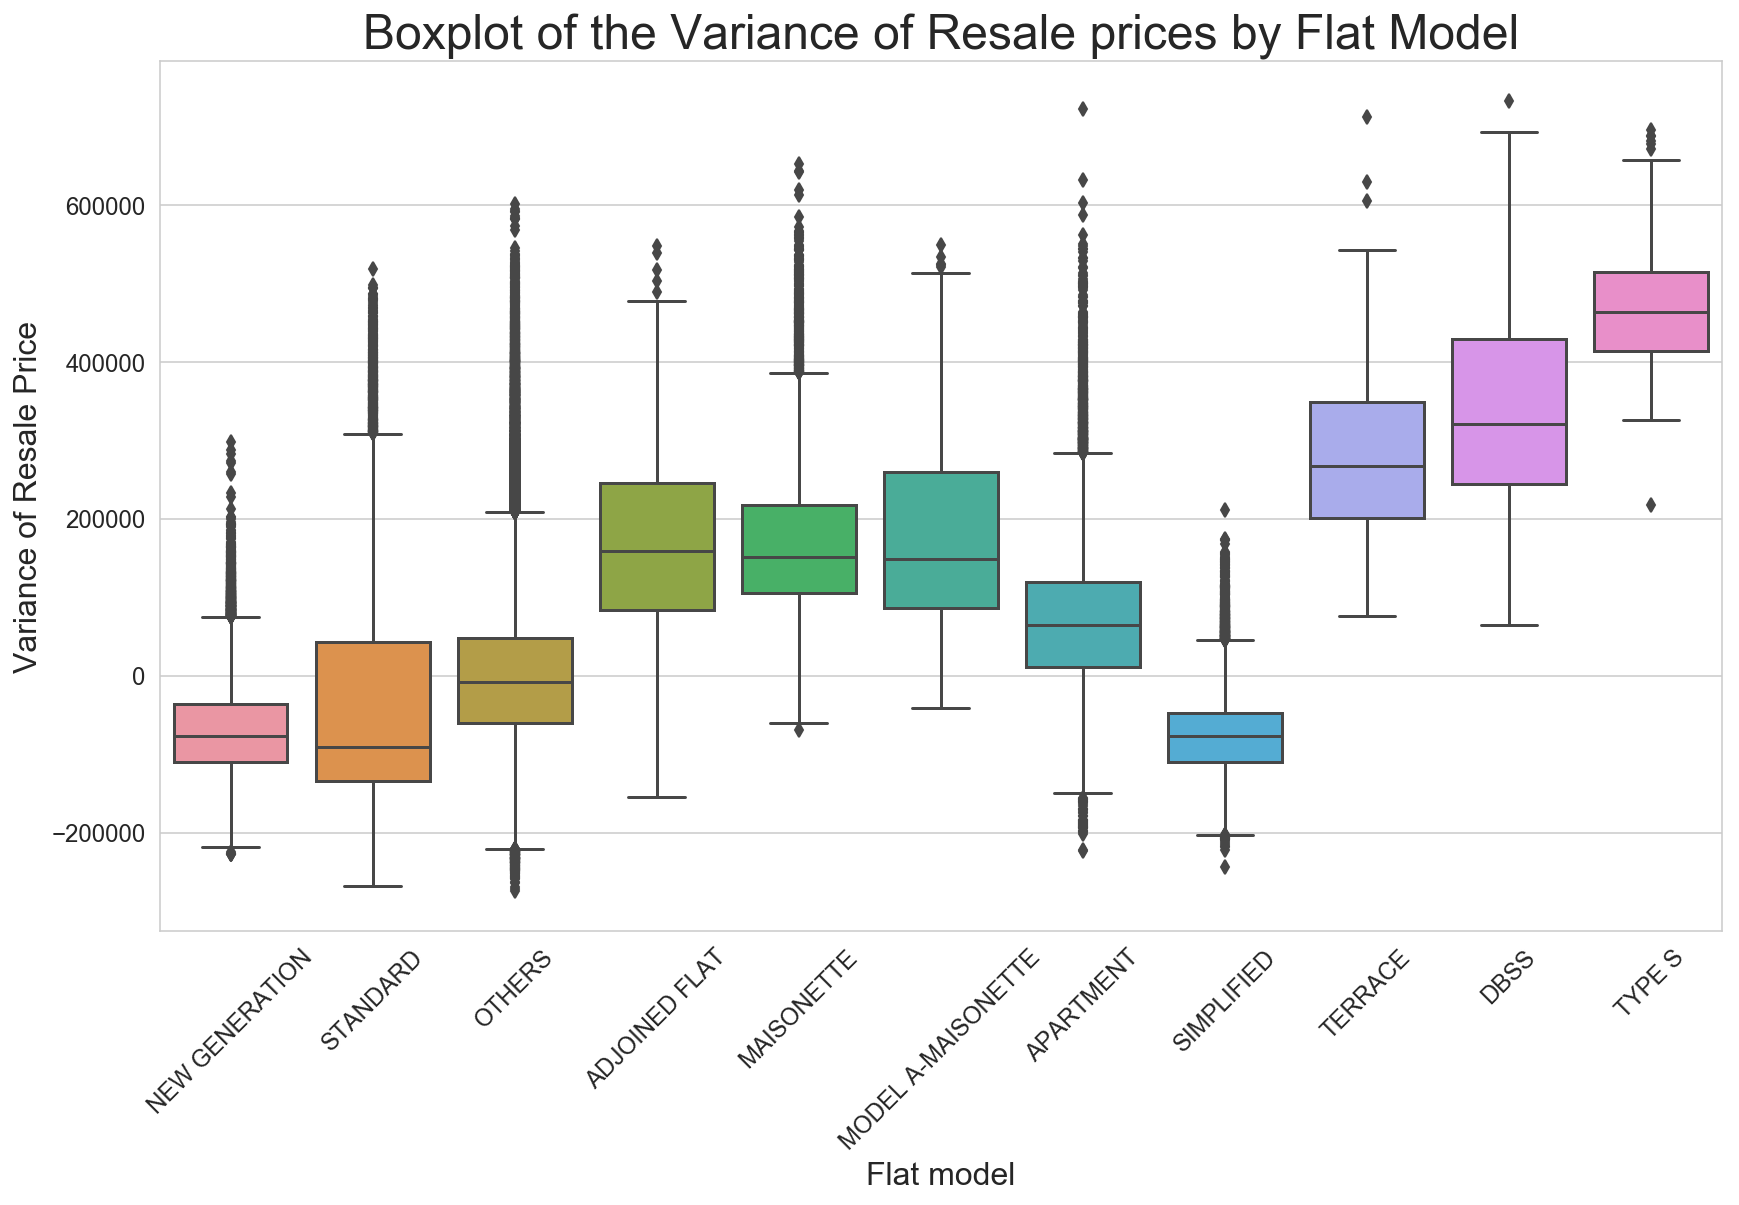

In [17]:
plt.figure(figsize=(14,8))
sns.boxplot(x=resale['flat_model'], y=resale['var_resale_price'], data=resale, orient='v')
plt.title('Boxplot of the Variance of Resale prices by Flat Model',fontsize=24)
plt.xlabel('Flat model',fontsize=16)
plt.ylabel('Variance of Resale Price',fontsize=16)
plt.xticks(fontsize=12,rotation = 45)
plt.yticks(fontsize=12)
plt.show()

In [18]:
resale.replace({'flat_type':{'MULTI-GENERATION':'MULTI GENERATION'}},inplace=True)
resale['flat_type'].value_counts()

4 ROOM              122654
3 ROOM               91778
5 ROOM               76819
EXECUTIVE            25173
2 ROOM                3232
1 ROOM                 201
MULTI GENERATION       118
Name: flat_type, dtype: int64

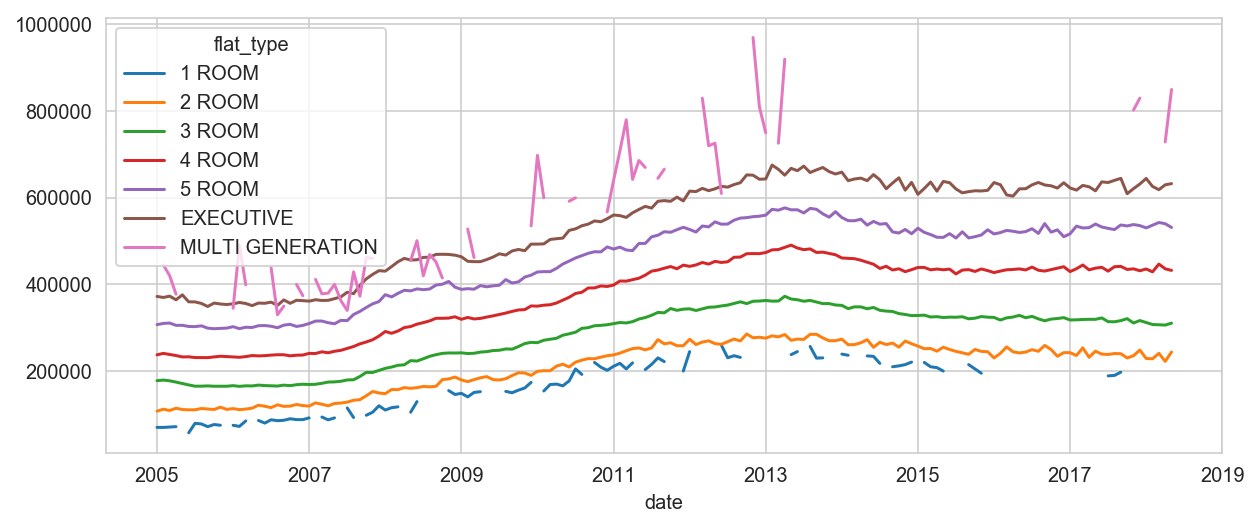

In [19]:
resale.groupby(['date','flat_type']).mean()['resale_price'].unstack().plot(figsize=(10,4));

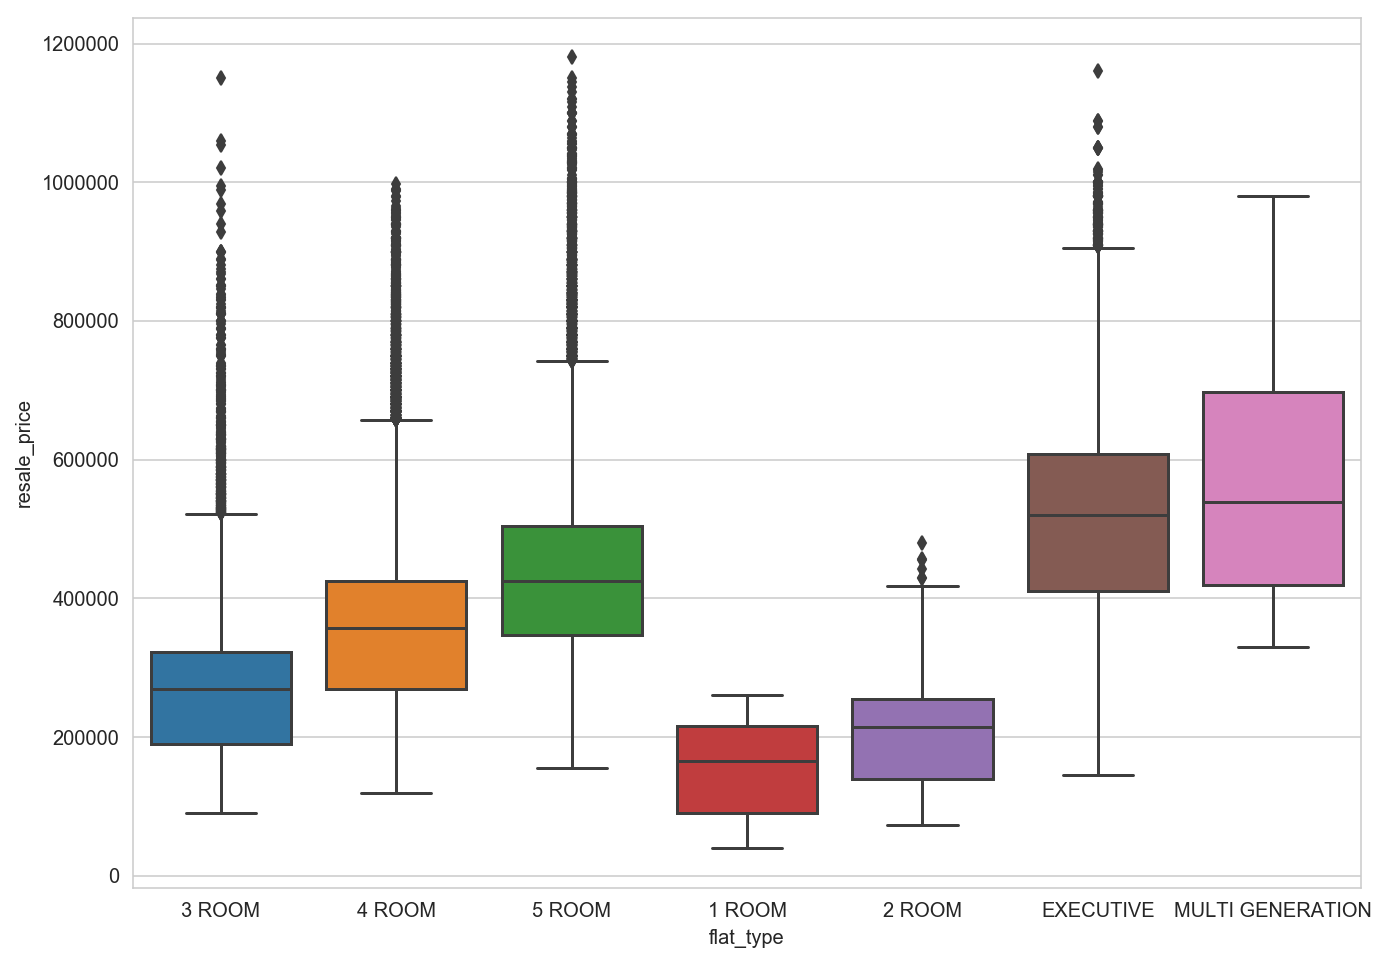

In [20]:
fig, ax = plt.subplots(figsize=(11,8))
sns.boxplot(x=resale['flat_type'], y=resale['resale_price'], data=resale, orient='v', ax=ax)
plt.show()

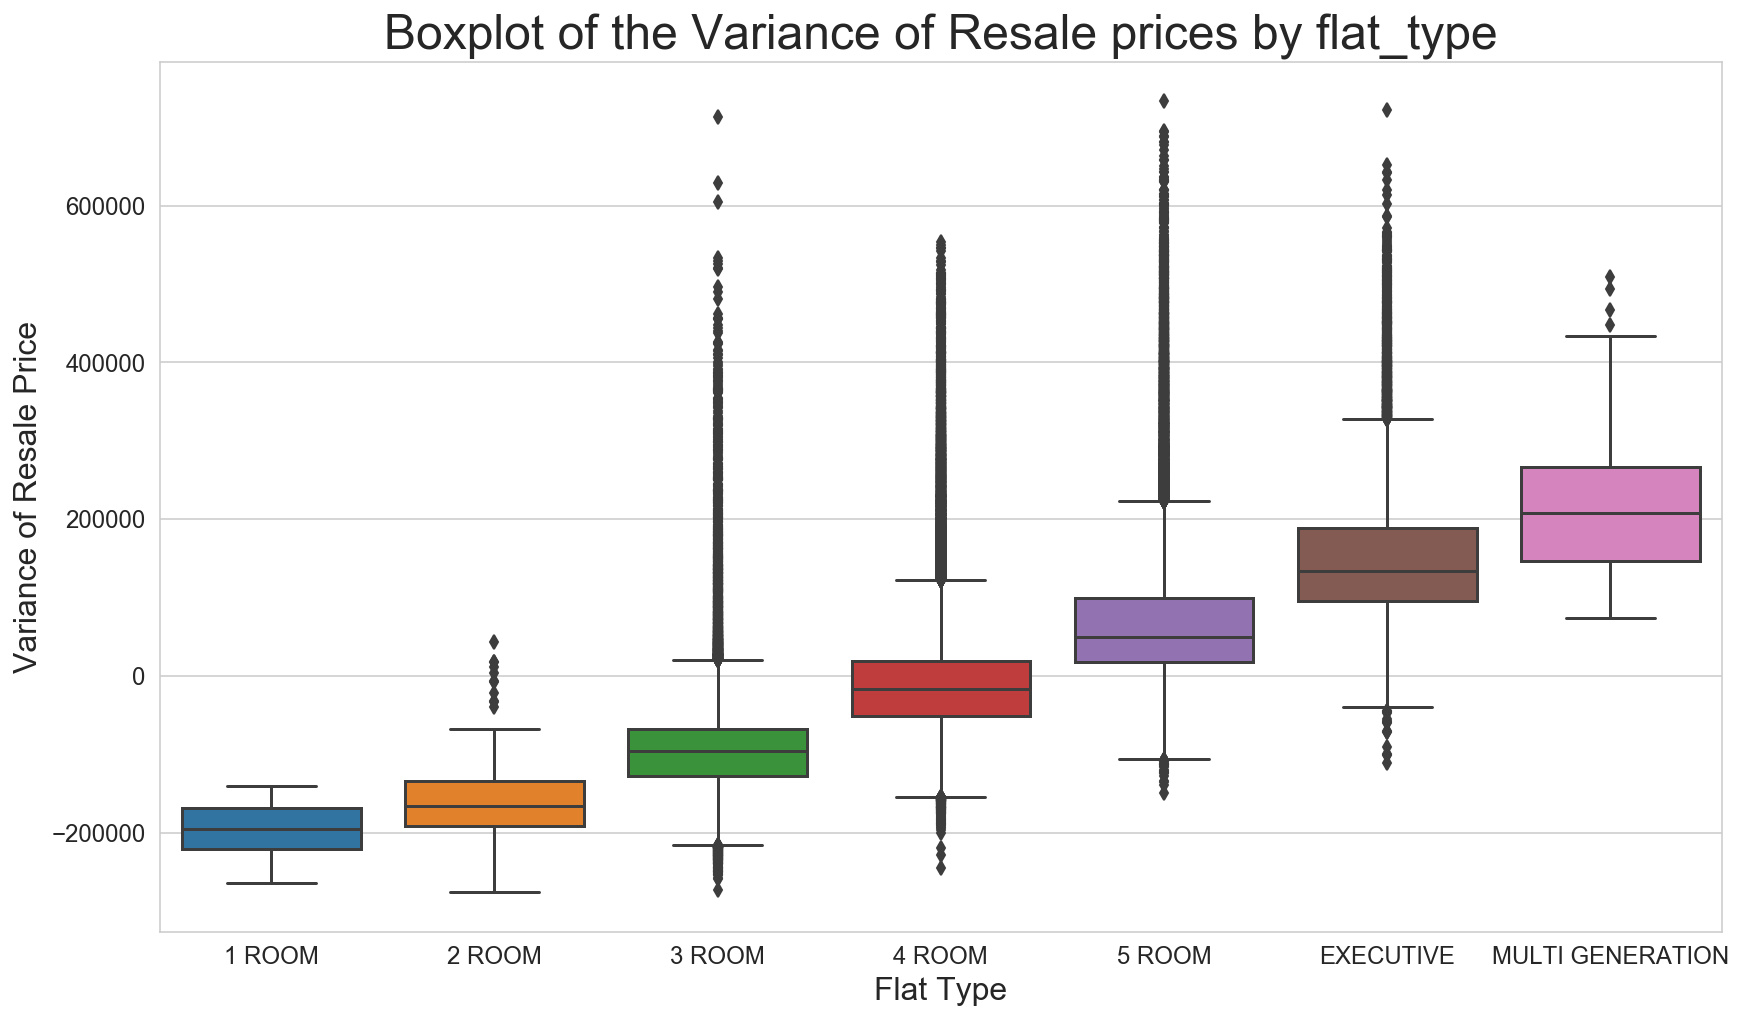

In [21]:
plt.figure(figsize=(14,8))
in_order = ['1 ROOM','2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE','MULTI GENERATION']
sns.boxplot(x=resale['flat_type'], y=resale['var_resale_price'], data=resale, orient='v', order = in_order)
plt.title('Boxplot of the Variance of Resale prices by flat_type',fontsize=24)
plt.xlabel('Flat Type',fontsize=16)
plt.ylabel('Variance of Resale Price',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 'floor_area_sqm'

C:\Users\ngyen\Anaconda2python2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    319975.000000
mean         96.935390
std          25.074766
min          31.000000
25%          74.000000
50%          98.000000
75%         113.000000
max         280.000000
Name: floor_area_sqm, dtype: float64

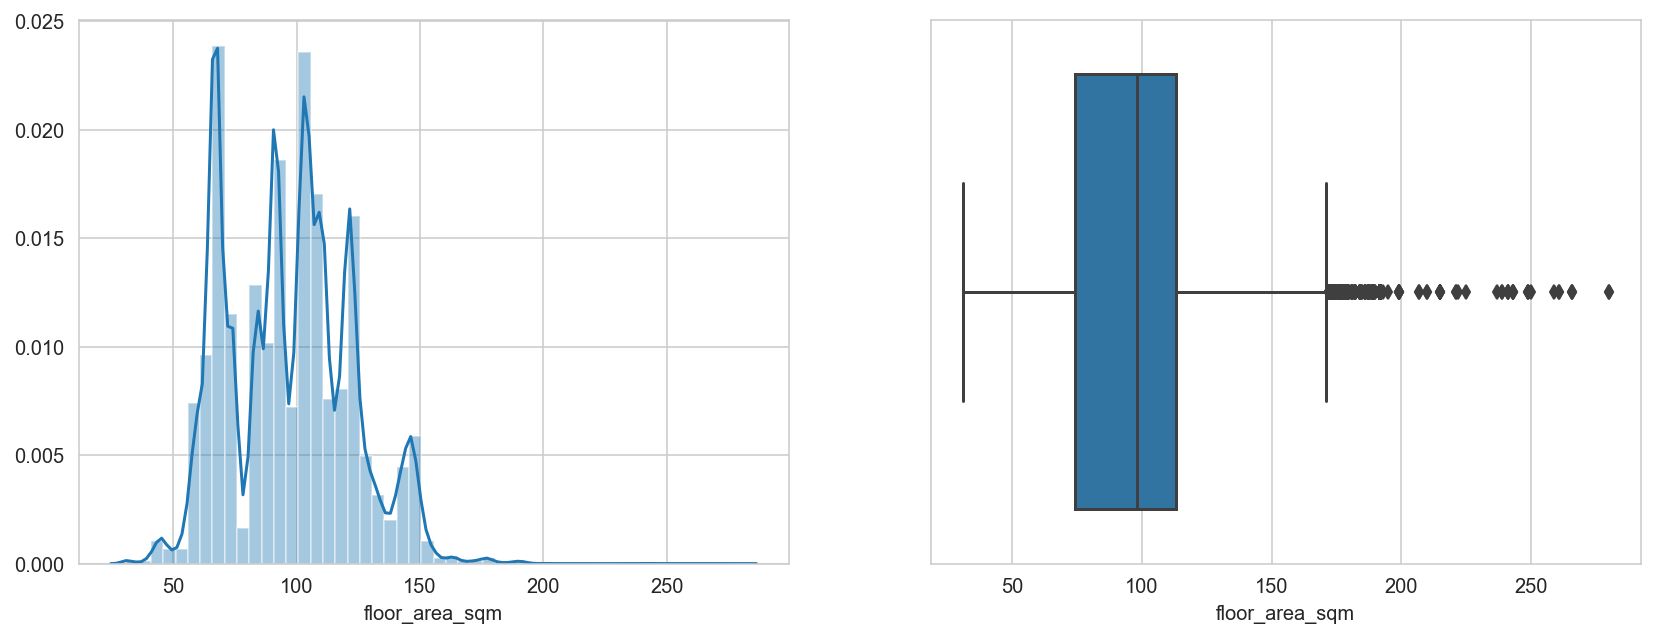

In [22]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,5))
sns.distplot(resale['floor_area_sqm'],ax=ax1)
sns.boxplot(resale['floor_area_sqm'],ax=ax2)
resale['floor_area_sqm'].describe()

C:\Users\ngyen\Anaconda2python2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


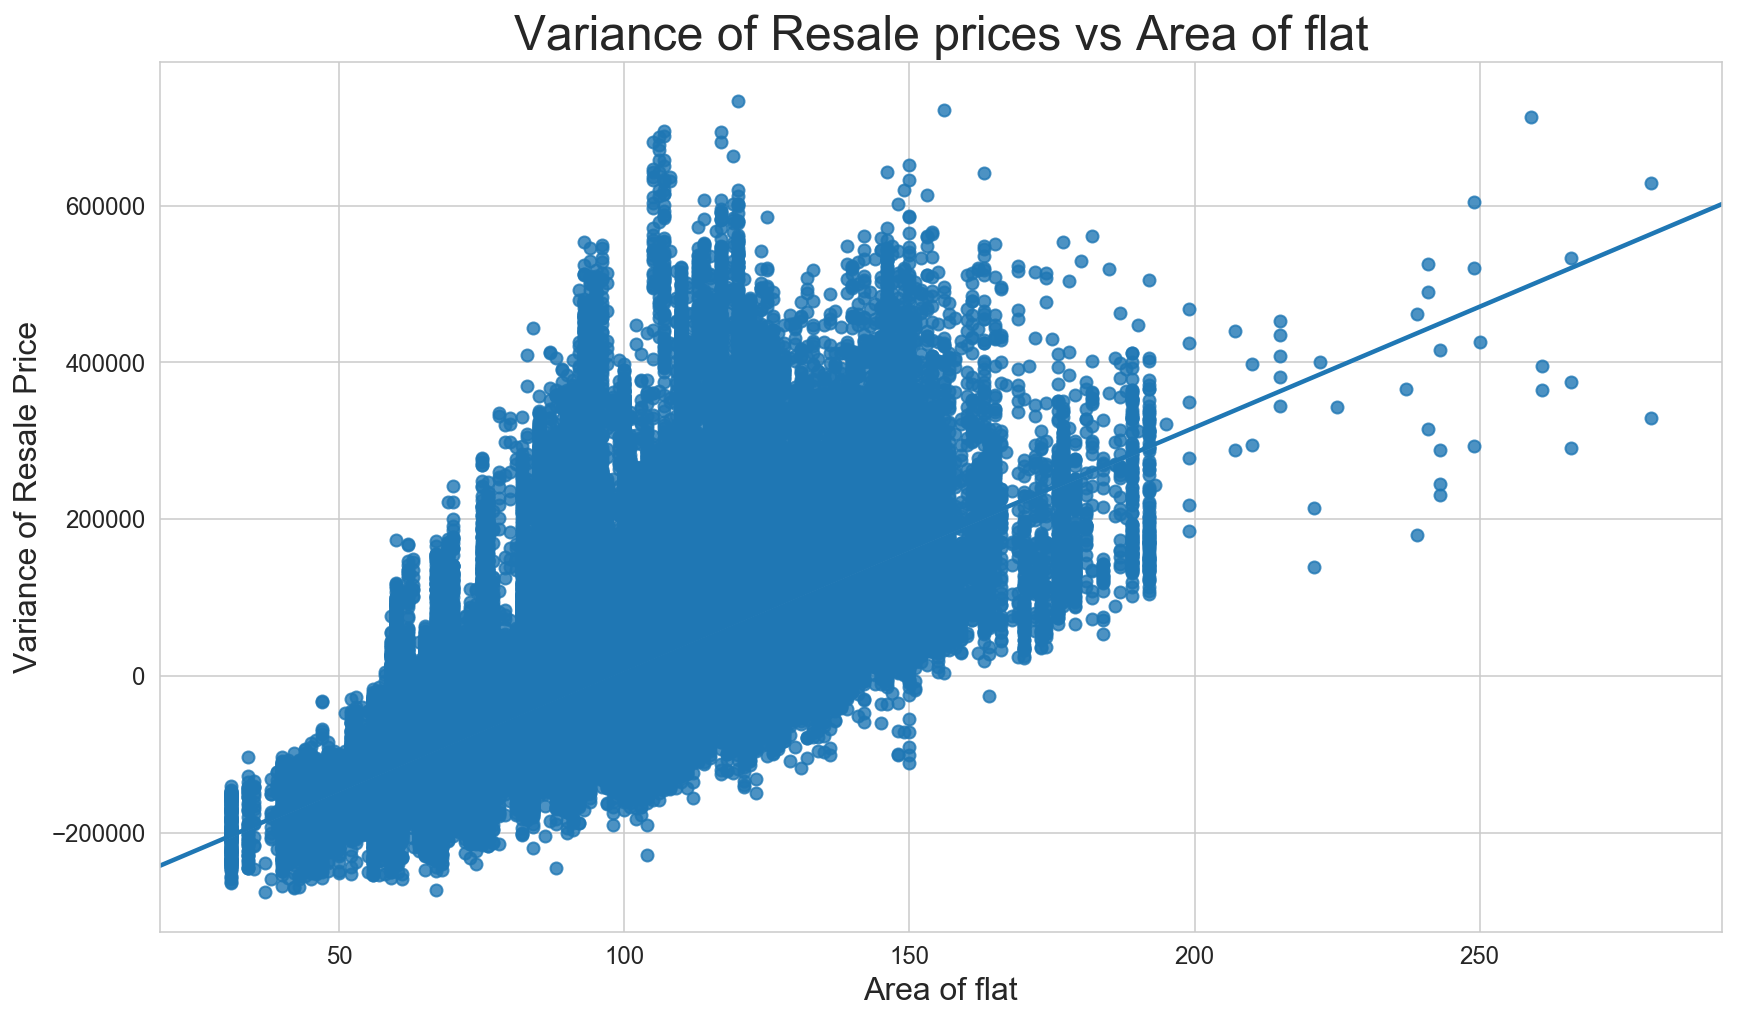

In [23]:
plt.figure(figsize=(14,8))
sns.regplot('floor_area_sqm','var_resale_price',resale)

plt.title('Variance of Resale prices vs Area of flat',fontsize=24)
plt.xlabel('Area of flat',fontsize=16)
plt.ylabel('Variance of Resale Price',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Story Range

In [24]:
pd.DataFrame(resale['storey_range'].value_counts()).reset_index().sort_values('index')

,index,storey_range
2,01 TO 03,64790
8,01 TO 05,2700
0,04 TO 06,78124
9,06 TO 10,2474
1,07 TO 09,68185
3,10 TO 12,58564
11,11 TO 15,1259
4,13 TO 15,24027
5,16 TO 18,9595
13,16 TO 20,265


In [25]:
resale['storey'] = [7 if floor == '06 TO 10' else 
                        13 if floor == '11 TO 15' else 
                        16 if floor == '19 TO 21' else
                        20 if floor[0] =='2' else 
                        30 if int(floor[0]) >= 3 else 
                        int(floor[:2]) for floor in resale['storey_range']]

In [26]:
resale['storey'].value_counts()

4     78124
7     70659
1     67490
10    58564
13    25286
16    14143
20     5071
30      638
Name: storey, dtype: int64

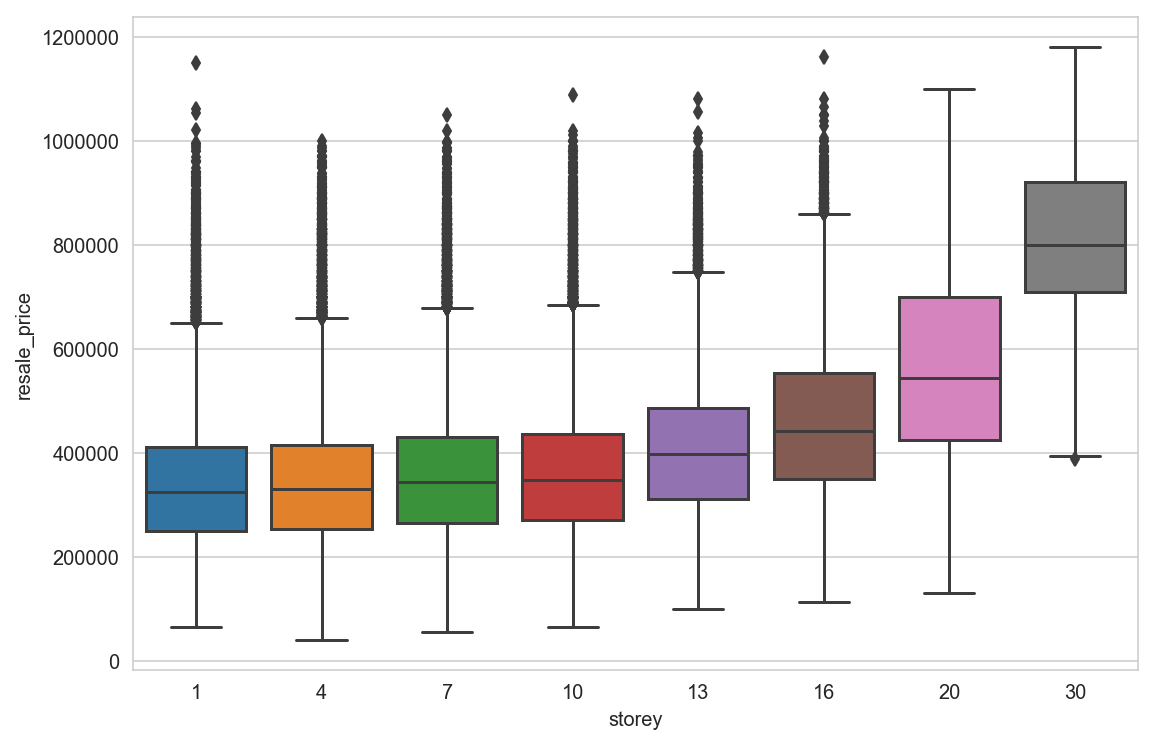

In [27]:
fig, ax = plt.subplots(figsize=(9,6))
sns.boxplot(x=resale['storey'], y=resale['resale_price'], data=resale, orient='v', ax=ax)
plt.show()

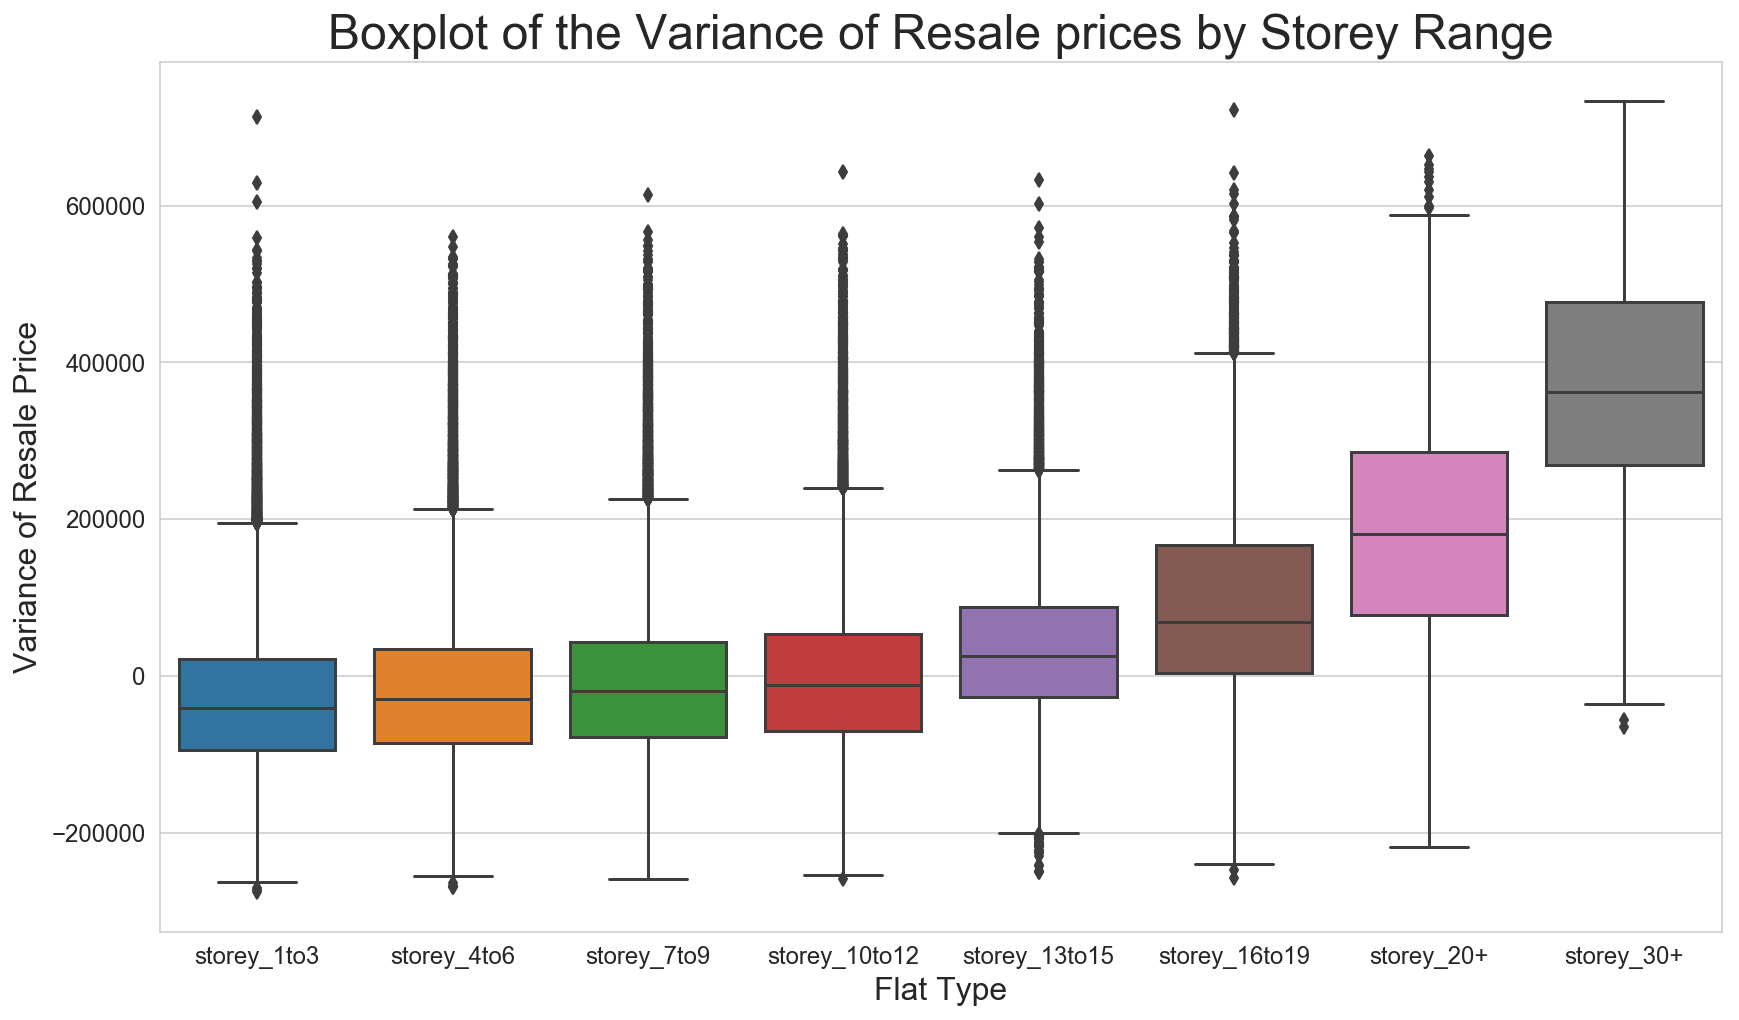

In [28]:
plt.figure(figsize=(14,8))
sns.boxplot(x=resale['storey'], y=resale['var_resale_price'], data=resale, orient='v')
plt.title('Boxplot of the Variance of Resale prices by Storey Range',fontsize=24)
plt.xlabel('Flat Type',fontsize=16)
plt.ylabel('Variance of Resale Price',fontsize=16)
xticks = ('storey_1to3','storey_4to6','storey_7to9','storey_10to12','storey_13to15','storey_16to19','storey_20+','storey_30+')
plt.xticks(np.arange(len(xticks)),xticks, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [29]:
fig, ax = plt.subplots(figsize=(9,6))

ax.set_xticklabels(,
                  rotation=45)
plt.title('Boxplot of the Variance of Resale prices by flat_type',fontsize=16)
plt.show()

SyntaxError: invalid syntax (<ipython-input-29-22824247193b>, line 3)

### Town

In [ ]:
#town
fig, ax = plt.subplots(figsize=(11,6))
sns.boxplot(x=resale['town'], y=resale['resale_price'], data=resale, orient='v', ax=ax)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=8 , rotation=75);

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=resale['year'], y=resale['resale_price'], data=resale, orient='v', ax=ax)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=45);

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=resale['month'], y=resale['resale_price'], data=resale, orient='v', ax=ax)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10 , rotation=45);

In [ ]:
df=resale[resale['year']>2015]
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df['town'], y=df['resale_price'], data=df, orient='v', ax=ax)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10 , rotation=45);

In [ ]:
df.groupby('month').mean()['resale_price'].plot()

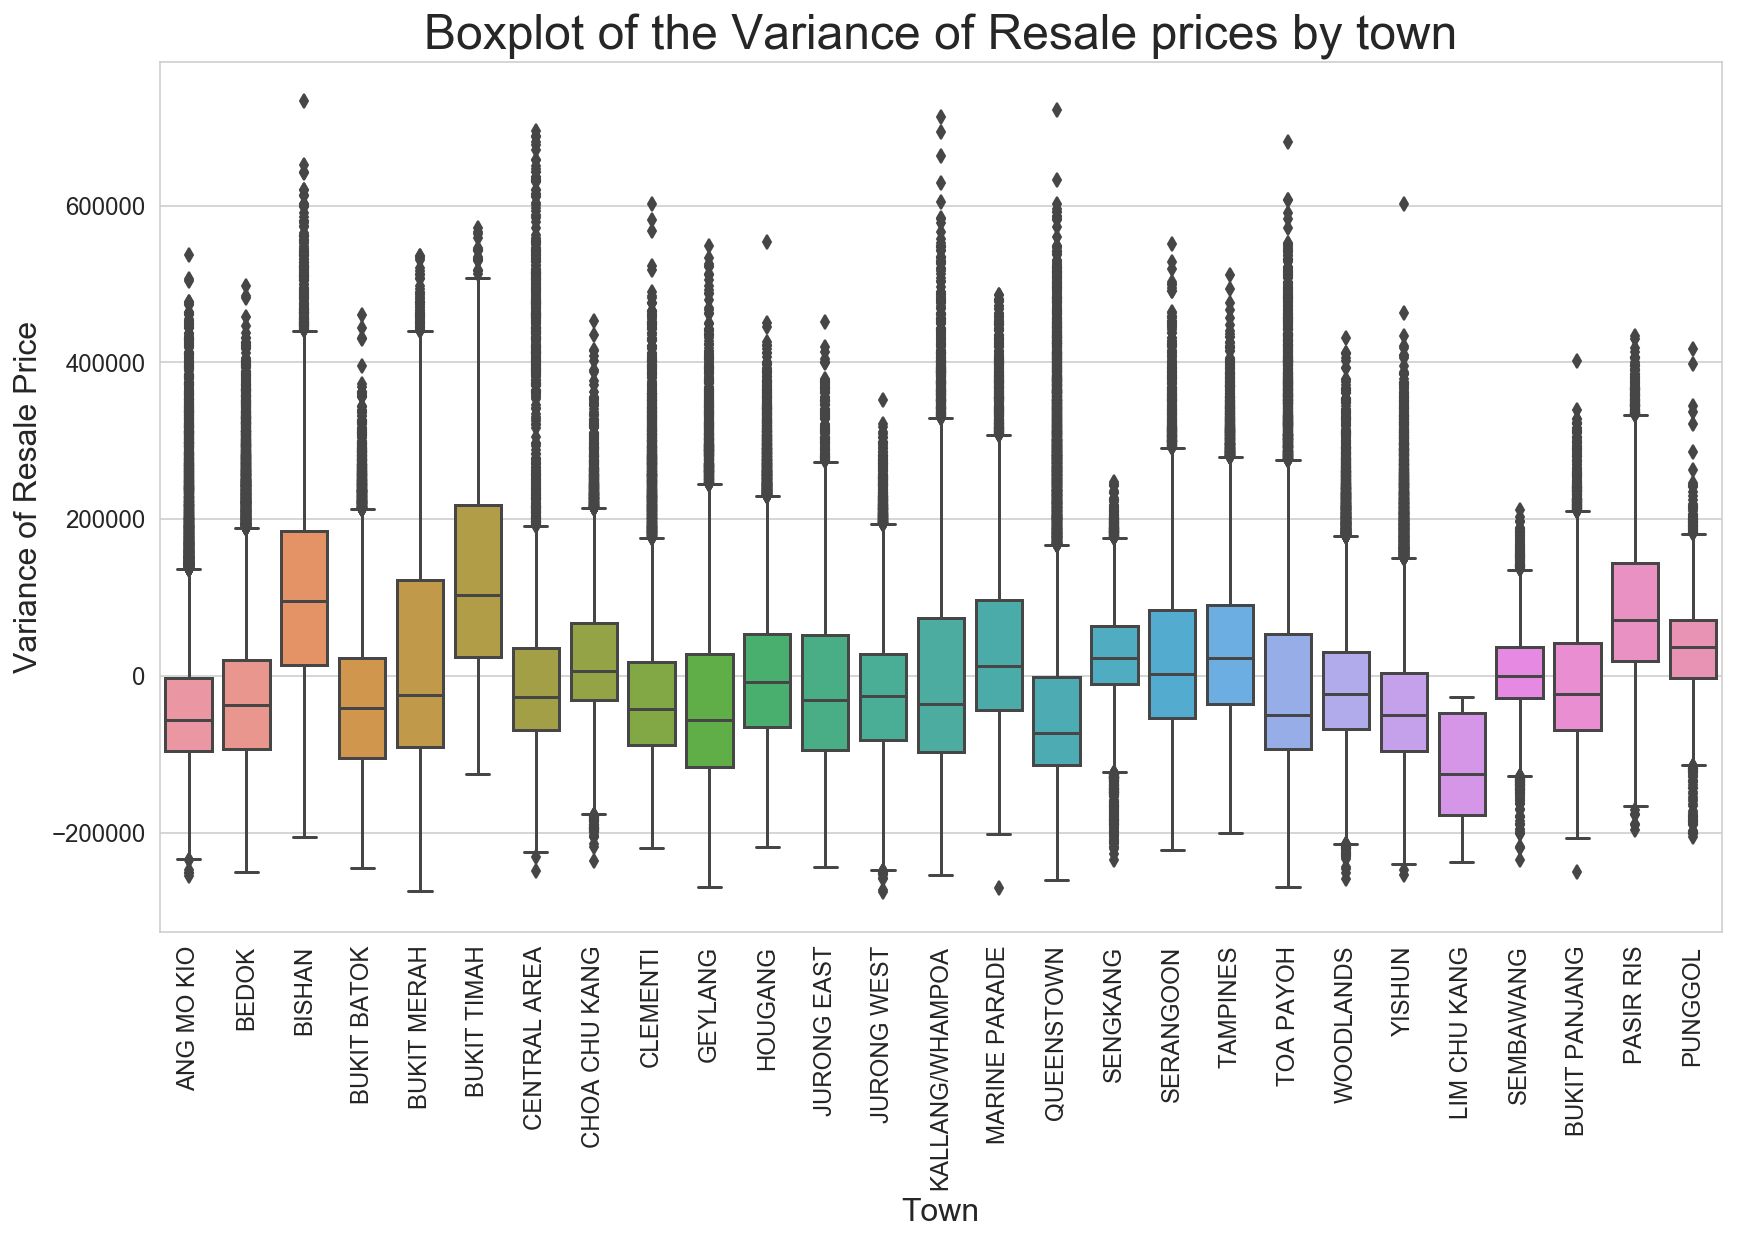

In [66]:
plt.figure(figsize=(14,8))
sns.boxplot(x=resale['town'], y=resale['var_resale_price'], data=resale, orient='v')
plt.title('Boxplot of the Variance of Resale prices by town',fontsize=24)
plt.xlabel('Town',fontsize=16)
plt.ylabel('Variance of Resale Price',fontsize=16)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.show()

## Load MRT Data

In [ ]:
mrt= pd.read_csv('./datasets/mrt_all.csv')
mrt.drop(['Unnamed: 0'],axis=1,inplace=True)
mrt = mrt[mrt.Opening_date != 'TBA']
mrt.Opening_date = pd.to_datetime(mrt.Opening_date.apply(lambda x: '1-Jan-'+ x[2:] if len(x)==4 else x))
mrt.full_station_name = [station + extension[-6:] if '(' in extension else 
                         station for station,extension in list(zip(mrt.full_station_name,mrt.Extension))]
mrt.reset_index(drop=True,inplace=True)
mrt.head()

In [ ]:
mrt.describe()

In [ ]:
sns.lmplot('longitude','latitude',mrt,fit_reg=False,height=5,aspect=2,);

In [ ]:
sns.lmplot('longitude','latitude',mrt,hue='Extension',fit_reg=False,height=5,aspect=2,);

In [ ]:
mrt.columns

In [ ]:
resale.columns

In [ ]:
mrt.Extension.value_counts()

In [ ]:
flatandmrt = resale[['town','street_name','latitude','longitude','date','resale_price']].copy()

In [ ]:
for i in range(len(mrt)):
    mrt_lat = mrt.loc[i,'latitude']
    mrt_lng = mrt.loc[i,'longitude']
    is_near_mrt_lat = flatandmrt['latitude'].apply(lambda x: (x-mrt_lat)**2)
    is_near_mrt_lng = flatandmrt['longitude'].apply(lambda x: (x-mrt_lng)**2)
    
    if 'MRT' in mrt.loc[i,'full_station_name']:
        print(i, 'mrt', mrt.loc[i,'full_station_name'])
        degree = 1/111
        is_near_mrt = (is_near_mrt_lat + is_near_mrt_lng < degree**2)
        flatandmrt['is_near_'+mrt.loc[i,'full_station_name']] = is_near_mrt*1
    else:
        print(i, 'lrt', mrt.loc[i,'full_station_name'])
        degree = 0.5/111
        is_near_mrt = (is_near_mrt_lat + is_near_mrt_lng < degree**2)
        flatandmrt['is_near_'+ mrt.loc[i,'full_station_name']] = is_near_mrt*1

In [ ]:
flatandmrt.to_csv('./datasets/flatandmrt.csv')

In [ ]:
print(flatandmrt.shape)
print(len(mrt))
print(mrt.full_station_name.nunique())

In [ ]:
flatandmrt.columns[6:]

In [ ]:
def create_nearmrt_bytime(flatandmrt,n_yr):
    year = timedelta(weeks=40, days=84, hours=23, minutes=50, seconds=600)
    for i,station_name in list(zip(range(len(mrt)),flatandmrt.columns[6:])):
        print(i,station_name)
        mrt_opening_date = mrt.loc[i,'Opening_date']
        have_mrt = flatandmrt['date'].apply(lambda x: (x>=mrt_opening_date-(n_yr*year)))
        flatandmrt[station_name]=flatandmrt[station_name]*have_mrt
    return flatandmrt

In [ ]:
flatandmrt_df = create_nearmrt_bytime(flatandmrt,0)

In [ ]:
bishan_data = pd.concat([flatandmrt[['is_near_Bishan MRT (CCL)']], resale[['town','flat_type','var_resale_price']]],axis=1)
bishan_data = bishan_data[(bishan_data['town']=='BISHAN')&(bishan_data['flat_type']=='4 ROOM')].reset_index(drop=True)

In [ ]:
flatandmrt.columns[4:]

In [ ]:
for head in flatandmrt.columns[4:]:
    plt.figure(figsize=(8,1))
    sns.boxplot(flatandmrt[flatandmrt['is_near_Choa Chu Kang MRT']==1]['is_near_Choa Chu Kang MRT']*flatandmrt['resale_price'])

## Load DATA ON BTO

In [ ]:
bto = pd.read_csv('./datasets/price-range-of-hdb-flats-offered.csv')
bto = bto[bto['min_selling_price']!='na']
bto.drop(['min_selling_price_less_ahg_shg','max_selling_price_less_ahg_shg'],axis=1,inplace= True)
bto.reset_index(drop=True,inplace=True)
bto['min_selling_price'] = bto['min_selling_price'].astype(int)
bto['max_selling_price'] = bto['max_selling_price'].astype(int)
bto.columns = ['year', 'town', 'flat_type', 'min_price', 'max_price']
bto['flat_type'] = bto['flat_type'].apply(lambda x: x[0]+' '+x[2:].upper())
bto['avg_price'] = (bto['min_price']+bto['max_price'])/2
bto['town'] = bto['town'].apply(lambda x: x.upper())
bto.info()

In [ ]:
sns.lmplot('year','min_price',bto,hue='flat_type',fit_reg=False)

In [ ]:
sns.lmplot('year','max_price',bto,hue='flat_type',fit_reg=False)

In [ ]:
temp_df = bto[bto['flat_type']=='4 ROOM']
sns.lmplot('year','max_price',temp_df,hue='town',fit_reg=False)

In [ ]:
for col in bto.columns:
    print(bto[col].value_counts())

In [ ]:
data = resale[(resale['year']>2007) & (resale['year']<2017)]
data = data[data['town'].isin(bto['town'].unique())]
data = data[(data['flat_type'] != 'EXECUTIVE') & (data['flat_type'] != '1 ROOM') & (data['flat_type'] != 'MULTI GENERATION')]

In [ ]:
for room,room_bto in data.flat_type.unique():
    data.groupby(['flat_type','town','year'])[['resale_price']].min().unstack().loc[room,:].T\
        .plot(figsize = (12,7),legend = 'lower right')
    plt.title(room)

In [ ]:
df_a = data.groupby(['flat_type','town','year'])[['resale_price']].min().unstack()
df_a.columns = df_a.columns.droplevel(0)

df_b = bto.groupby(['flat_type','town','year'])[['min_price']].min().unstack()
df_b.columns = df_b.columns.droplevel(0)

df_diff = df_a.subtract(df_b)
df_diff.div(df_a)

In [ ]:
df_a = data.groupby(['flat_type','town','year'])[['resale_price']].max().unstack()
df_a.columns = df_a.columns.droplevel(0)

df_b = bto.groupby(['flat_type','town','year'])[['max_price']].max().unstack()
df_b.columns = df_b.columns.droplevel(0)

df_diff = df_a.subtract(df_b)
df_diff.div(df_a)

In [ ]:
df_a = data.groupby(['flat_type','town','year'])[['resale_price']].mean().unstack()
df_a.columns = df_a.columns.droplevel(0)

df_b = bto.groupby(['flat_type','town','year'])[['avg_price']].mean().unstack()
df_b.columns = df_b.columns.droplevel(0)

df_diff = df_a.subtract(df_b)
df_diff.div(df_a)

In [ ]:
bto['town'] = bto['town'].apply(lambda x: x.upper())

In [ ]:
data.flat_type.unique()

In [ ]:
temp_df = data[data['town'].isin(bto['town'].unique())]
temp_df = temp_df[temp_df['flat_type']=='4 ROOM']
sns.lmplot('year','resale_price',temp_df,hue='town',fit_reg=False)

In [ ]:
resale['town'].unique()

In [ ]:
bto['financial_year'].unique()

In [ ]:
data.groupby(['room_type'])

## EDA
### EDA by Coordinates

In [30]:
resale_by_coord = resale.groupby(['longitude','latitude','town']).count()['block']
resale_by_coord = resale_by_coord.reset_index()
resale_by_coord.rename(columns={'block':'resale_num'}, inplace=True)
resale_by_coord.sort_values('resale_num',ascending = False)

,longitude,latitude,town,resale_num
2801,103.799575,1.293686,QUEENSTOWN,2198
2796,103.799575,1.293686,GEYLANG,2006
2804,103.799575,1.293686,WOODLANDS,1171
2799,103.799575,1.293686,MARINE PARADE,1169
2798,103.799575,1.293686,KALLANG/WHAMPOA,870
2795,103.799575,1.293686,CLEMENTI,628
2708,103.797117,1.300366,QUEENSTOWN,509
2790,103.799575,1.293686,BUKIT MERAH,446
2793,103.799575,1.293686,CENTRAL AREA,276
434,103.713848,1.348267,JURONG WEST,264


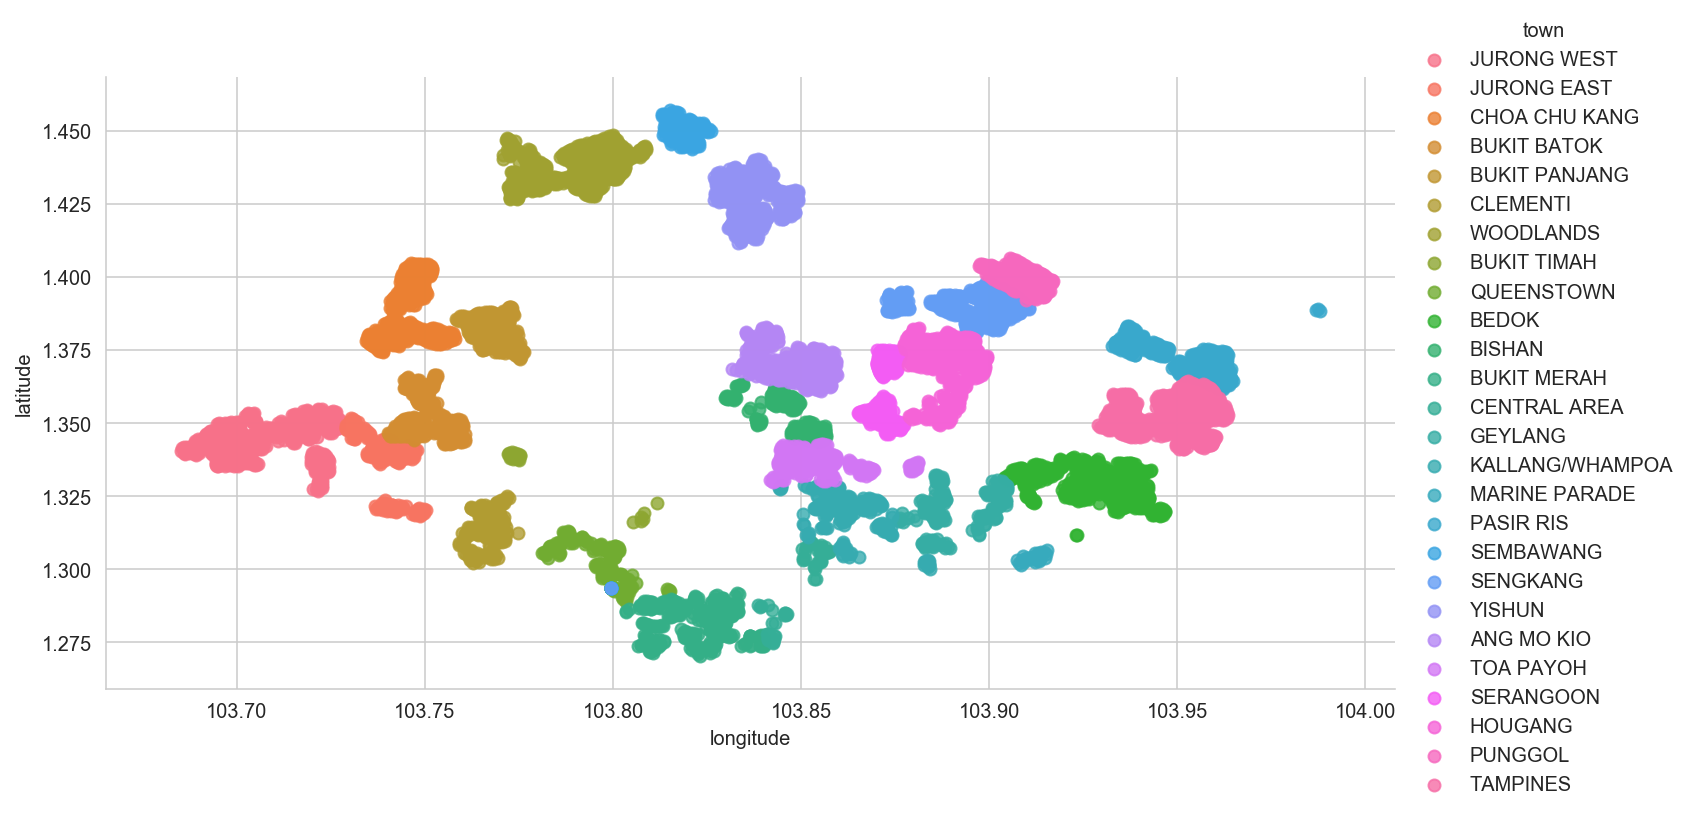

In [31]:
sns.lmplot('longitude','latitude',resale_by_coord,hue='town',fit_reg=False,height=5,aspect=2,);

In [ ]:
resale_by_coord = resale_by_coord.sort_values('resale_num',ascending = False)
plt.figure(figsize=(10,5))
points = plt.scatter(resale_by_coord['longitude'],resale_by_coord['latitude'],
                     c= resale_by_coord['resale_num'],cmap="winter")
plt.colorbar(points)
plt.scatter(mrt['longitude'],mrt['latitude'],c='k')

plt.title('No of resales by coordinates')
plt.legend(('No. of Resales at a coordinate','Position of MRT/LRT'))
plt.xlabel('Longitude')
plt.ylabel('Latitude');

In [ ]:
resale_by_coord['resale_num'].describe()

In [ ]:
resale_by_coord['resale_range'] = [np.percentile(resale_by_coord['resale_num'],10) if num<np.percentile(resale_by_coord['resale_num'],10) else
                                   np.percentile(resale_by_coord['resale_num'],20) if num<np.percentile(resale_by_coord['resale_num'],20) else
                                   np.percentile(resale_by_coord['resale_num'],30) if num<np.percentile(resale_by_coord['resale_num'],30) else
                                   np.percentile(resale_by_coord['resale_num'],40) if num<np.percentile(resale_by_coord['resale_num'],40) else
                                   np.percentile(resale_by_coord['resale_num'],50) if num<np.percentile(resale_by_coord['resale_num'],50) else
                                   np.percentile(resale_by_coord['resale_num'],60) if num<np.percentile(resale_by_coord['resale_num'],60) else
                                   np.percentile(resale_by_coord['resale_num'],70) if num<np.percentile(resale_by_coord['resale_num'],70) else
                                   np.percentile(resale_by_coord['resale_num'],80) if num<np.percentile(resale_by_coord['resale_num'],80) else
                                   np.percentile(resale_by_coord['resale_num'],90) if num<np.percentile(resale_by_coord['resale_num'],90) else
                                   np.percentile(resale_by_coord['resale_num'],100) for num in resale_by_coord['resale_num']]

In [ ]:
resale_by_coord= resale_by_coord.sort_values('resale_range',ascending = True)
plt.figure(figsize=(14,6))
points = plt.scatter(resale_by_coord['longitude'],resale_by_coord['latitude'],
                     c= resale_by_coord['resale_range'],cmap="RdYlBu")
plt.colorbar(points)
plt.scatter(mrt['longitude'],mrt['latitude'],c='k')

plt.title('No of resales by coordinates')
plt.legend(('No. of Resales at a coordinate','Position of MRT/LRT'))
plt.xlabel('Longitude')
plt.ylabel('Latitude');

In [ ]:
resale_by_coord = resale_by_coord.sort_values('resale_num',ascending = True)
plt.figure(figsize=(10,5))
points = plt.scatter(resale_by_coord['longitude'],resale_by_coord['latitude'],
                     c= resale_by_coord['resale_num'].apply(np.log),cmap="RdYlBu")
plt.colorbar(points)
plt.scatter(mrt['longitude'],mrt['latitude'],c='k')

plt.title('No of resales by coordinates')
plt.legend(('No. of Resales at a coordinate','Position of MRT/LRT'))
plt.xlabel('Longitude')
plt.ylabel('Latitude');

In [39]:
varpx_by_coord = resale.groupby(['longitude','latitude','town']).mean()[['var_resale_price']].reset_index()
town_px = resale.groupby(['town']).mean()['var_resale_price'].to_dict()

In [57]:
resale.groupby(['town']).mean()['var_resale_price'].sort_values()

town
YISHUN             -63228.828104
GEYLANG            -31605.469970
ANG MO KIO         -28712.997889
BUKIT BATOK        -28466.456796
BEDOK              -25783.361029
WOODLANDS          -24261.704363
JURONG WEST        -23231.560715
JURONG EAST        -13763.487936
BUKIT PANJANG       -8080.786025
CHOA CHU KANG       -7766.633762
HOUGANG             -7652.926549
CLEMENTI              -63.945415
SEMBAWANG            1974.365726
TOA PAYOH           10416.620704
SERANGOON           17784.768539
KALLANG/WHAMPOA     19528.866160
TAMPINES            19877.141935
SENGKANG            27043.934177
QUEENSTOWN          28447.152220
PUNGGOL             35137.862587
PASIR RIS           51534.585725
CENTRAL AREA        68343.651745
BUKIT MERAH         69429.274975
MARINE PARADE       80733.786398
BISHAN             112749.883609
BUKIT TIMAH        160578.832647
Name: var_resale_price, dtype: float64

In [50]:
for i,town in enumerate(varpx_by_coord['town']):
    varpx_by_coord.loc[i,'var_resale_price'] = town_px[town]

In [51]:
varpx_by_coord

,longitude,latitude,town,var_resale_price
0,103.685164,1.340518,JURONG WEST,-23231.560715
1,103.685526,1.341542,JURONG WEST,-23231.560715
2,103.685979,1.341833,JURONG WEST,-23231.560715
3,103.685981,1.339643,JURONG WEST,-23231.560715
4,103.686002,1.341082,JURONG WEST,-23231.560715
5,103.686119,1.339921,JURONG WEST,-23231.560715
6,103.686250,1.339340,JURONG WEST,-23231.560715
7,103.686431,1.340511,JURONG WEST,-23231.560715
8,103.686467,1.341203,JURONG WEST,-23231.560715
9,103.686884,1.341901,JURONG WEST,-23231.560715


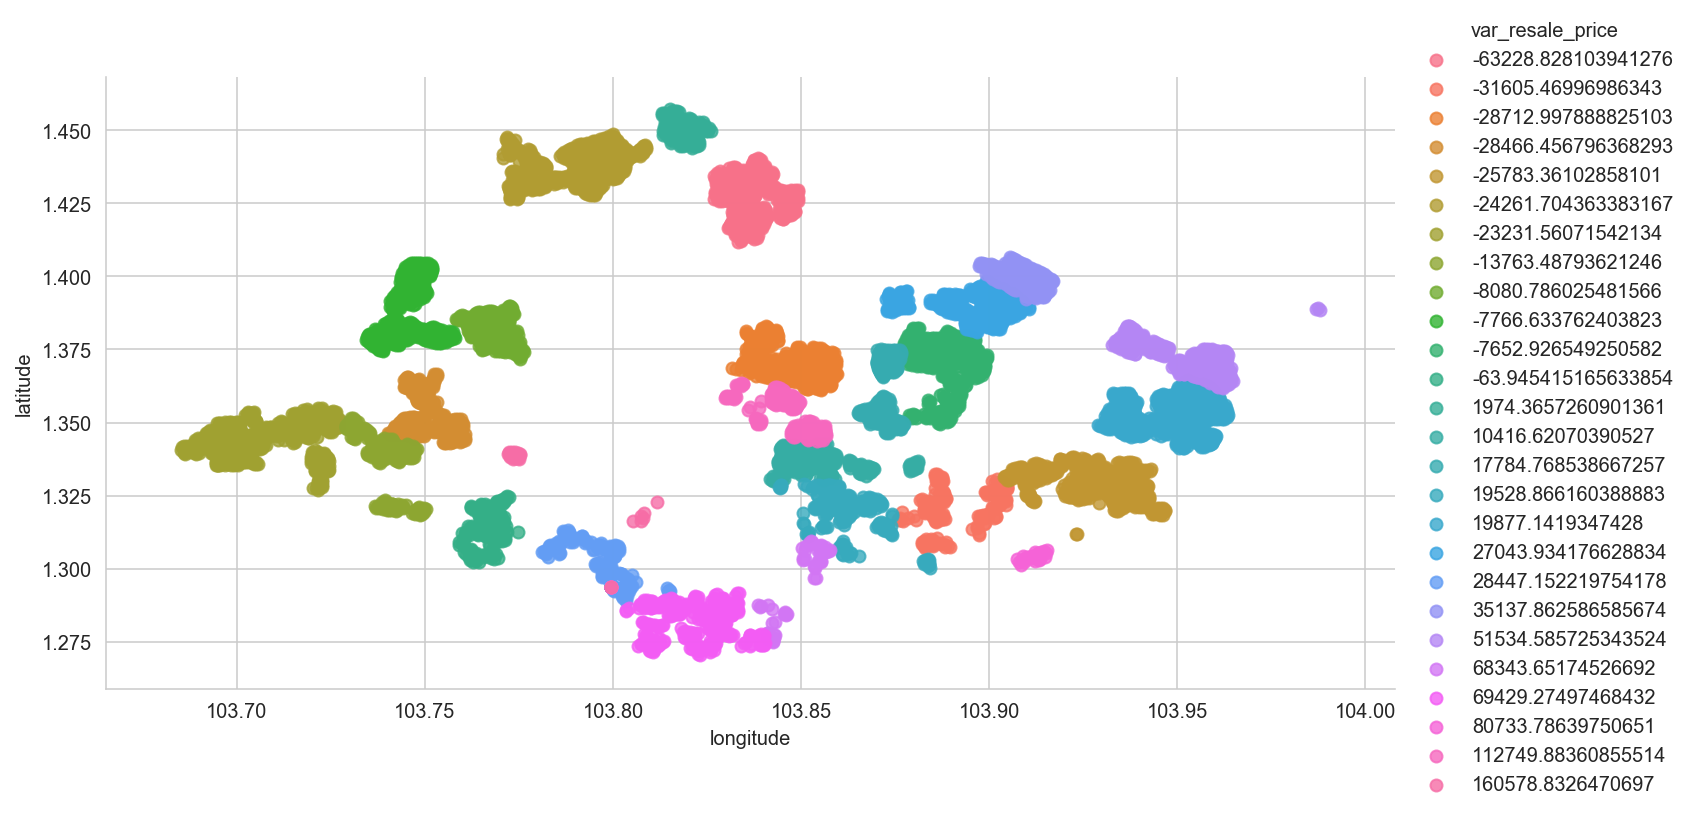

In [54]:
sns.lmplot('longitude','latitude',varpx_by_coord,hue='var_resale_price',fit_reg=False,height=5,aspect=2);

In [ ]:
resale_by_coord = resale.groupby(['longitude','latitude','town']).mean()['var_resale_price']
resale_by_coord = resale_by_coord.reset_index()
resale_by_coord.rename(columns={'block':'resale_num'}, inplace=True)
resale_by_coord.sort_values('resale_num',ascending = False)

### EDA on relationship between variables

In [ ]:
resale.columns

In [ ]:
sns.pairplot(resale.drop(['block','remaining_lease','street_name','formatted_address','postal_code','date',
                          'flat_model_PREMIUM','flat_model_IMPROVED', 'flat_model_MODEL_A','storey_range'],axis=1))

In [ ]:
df = resale.drop(['block','remaining_lease','street_name','formatted_address','postal_code','date',
                          'flat_model_PREMIUM','flat_model_IMPROVED', 'flat_model_MODEL_A','storey_range'],axis=1)

plt.figure(figsize=(10,6))
mask = np.zeros_like(abs(df.corr()), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(abs(df.corr()), mask=mask, annot=True,vmin=0,vmax=1)

### EDA on average price over time 

In [58]:
price_time = resale.groupby(['date']).mean()[['resale_price']]
price_time = pd.DataFrame(price_time.resale_price.resample('M').sum())
print(price_time.shape)
price_time.head()

(161, 1)


,resale_price
date,
2005-01-31,234566.718591
2005-02-28,239146.119171
2005-03-31,235890.113537
2005-04-30,236068.993031
2005-05-31,233489.878448


In [59]:
resale[resale['year']>2007].shape

(235521, 25)

In [60]:
inflation = pd.read_csv('./datasets/inflation_rate.csv')
inflation['value_of_1000_today'] = inflation['value_of_1000_today'].astype(int)/1000
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
Year                   29 non-null int64
value_of_1000_today    29 non-null float64
percentage_change      29 non-null float64
compounded_interest    29 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1008.0 bytes


In [61]:
inflate = inflation[['Year','value_of_1000_today']].values.tolist()

In [62]:
price_time['year'] = price_time.index.year.astype(int)

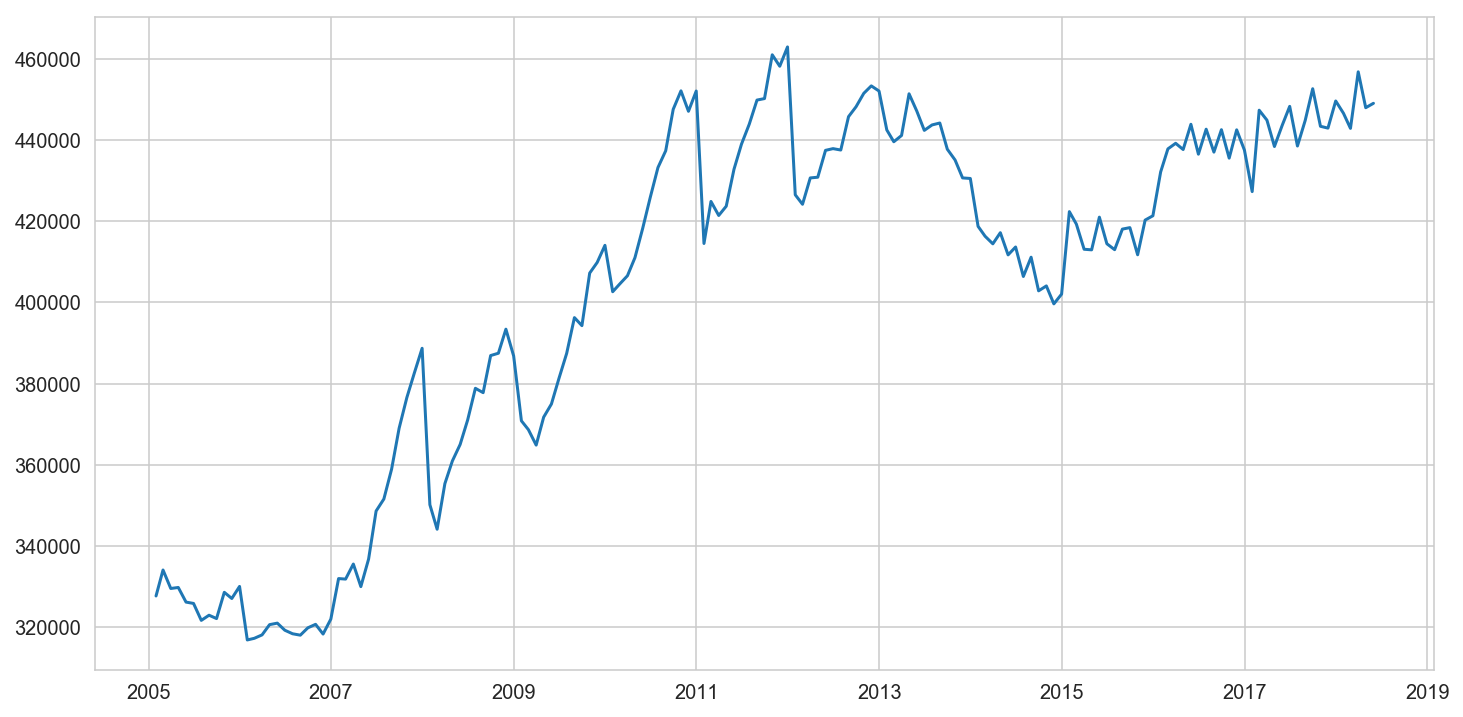

In [63]:
price_time['adj_price'] = [price*change for p_year,price in zip(price_time['year'],price_time['resale_price']) 
                                        for [year,change] in inflate 
                                        if p_year == year]
plt.figure(figsize=(12,6))
plt.plot(price_time['adj_price'])            

In [97]:
resale.groupby('date').min()['var_resale_price']

date
2005-01-01   -164566.718591
2005-02-01   -169146.119171
2005-03-01   -180890.113537
2005-04-01   -171068.993031
2005-05-01   -142489.878448
2005-06-01   -193255.283495
2005-07-01   -152269.787789
2005-08-01   -153178.260993
2005-09-01   -163087.635350
2005-10-01   -170215.212690
2005-11-01   -159127.057259
2005-12-01   -146251.162174
2006-01-01   -165369.384993
2006-02-01   -169668.245992
2006-03-01   -155291.697523
2006-04-01   -152156.081166
2006-05-01   -151431.438487
2006-06-01   -156140.152506
2006-07-01   -153495.915833
2006-08-01   -152239.638662
2006-09-01   -150074.825889
2006-10-01   -147214.211416
2006-11-01   -147442.896668
2006-12-01   -150167.882232
2007-01-01   -157095.140673
2007-02-01   -140997.000000
2007-03-01   -154747.898477
2007-04-01   -157625.583737
2007-05-01   -161655.193128
2007-06-01   -158422.959982
                  ...      
2015-12-01   -219320.543116
2016-01-01   -230097.665625
2016-02-01   -237776.373333
2016-03-01   -224151.407251
2016-04-01   -2

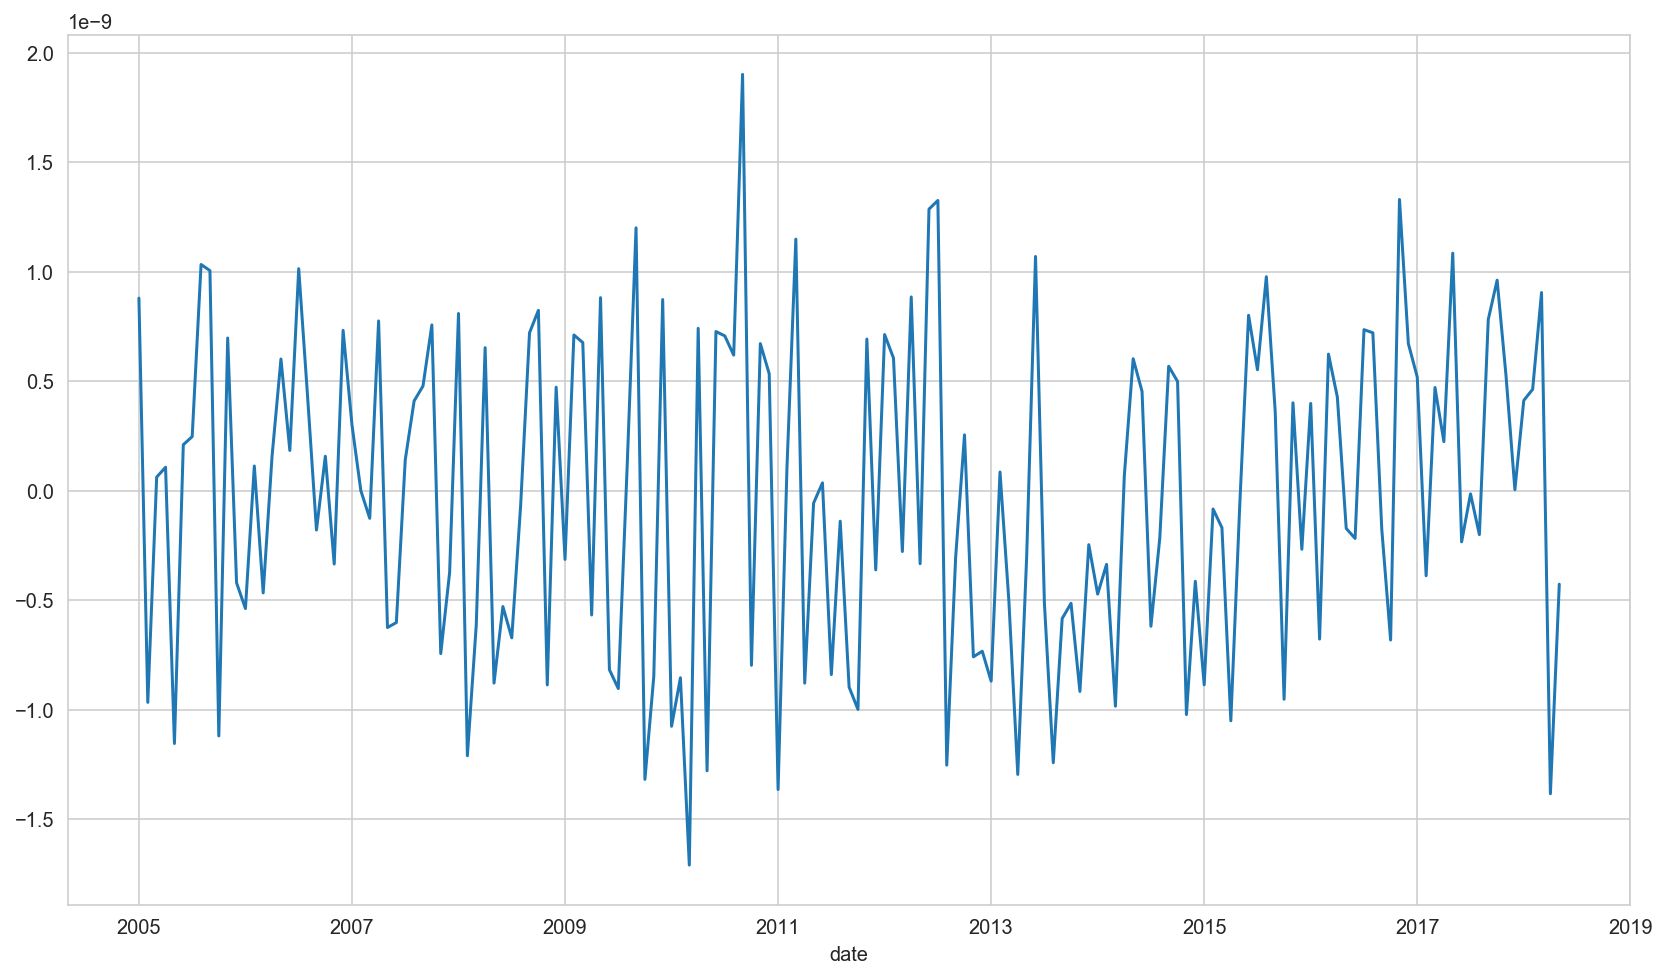

In [69]:
plt.figure(figsize = (14,8))
resale.groupby('date').mean()['var_resale_price'].plot()

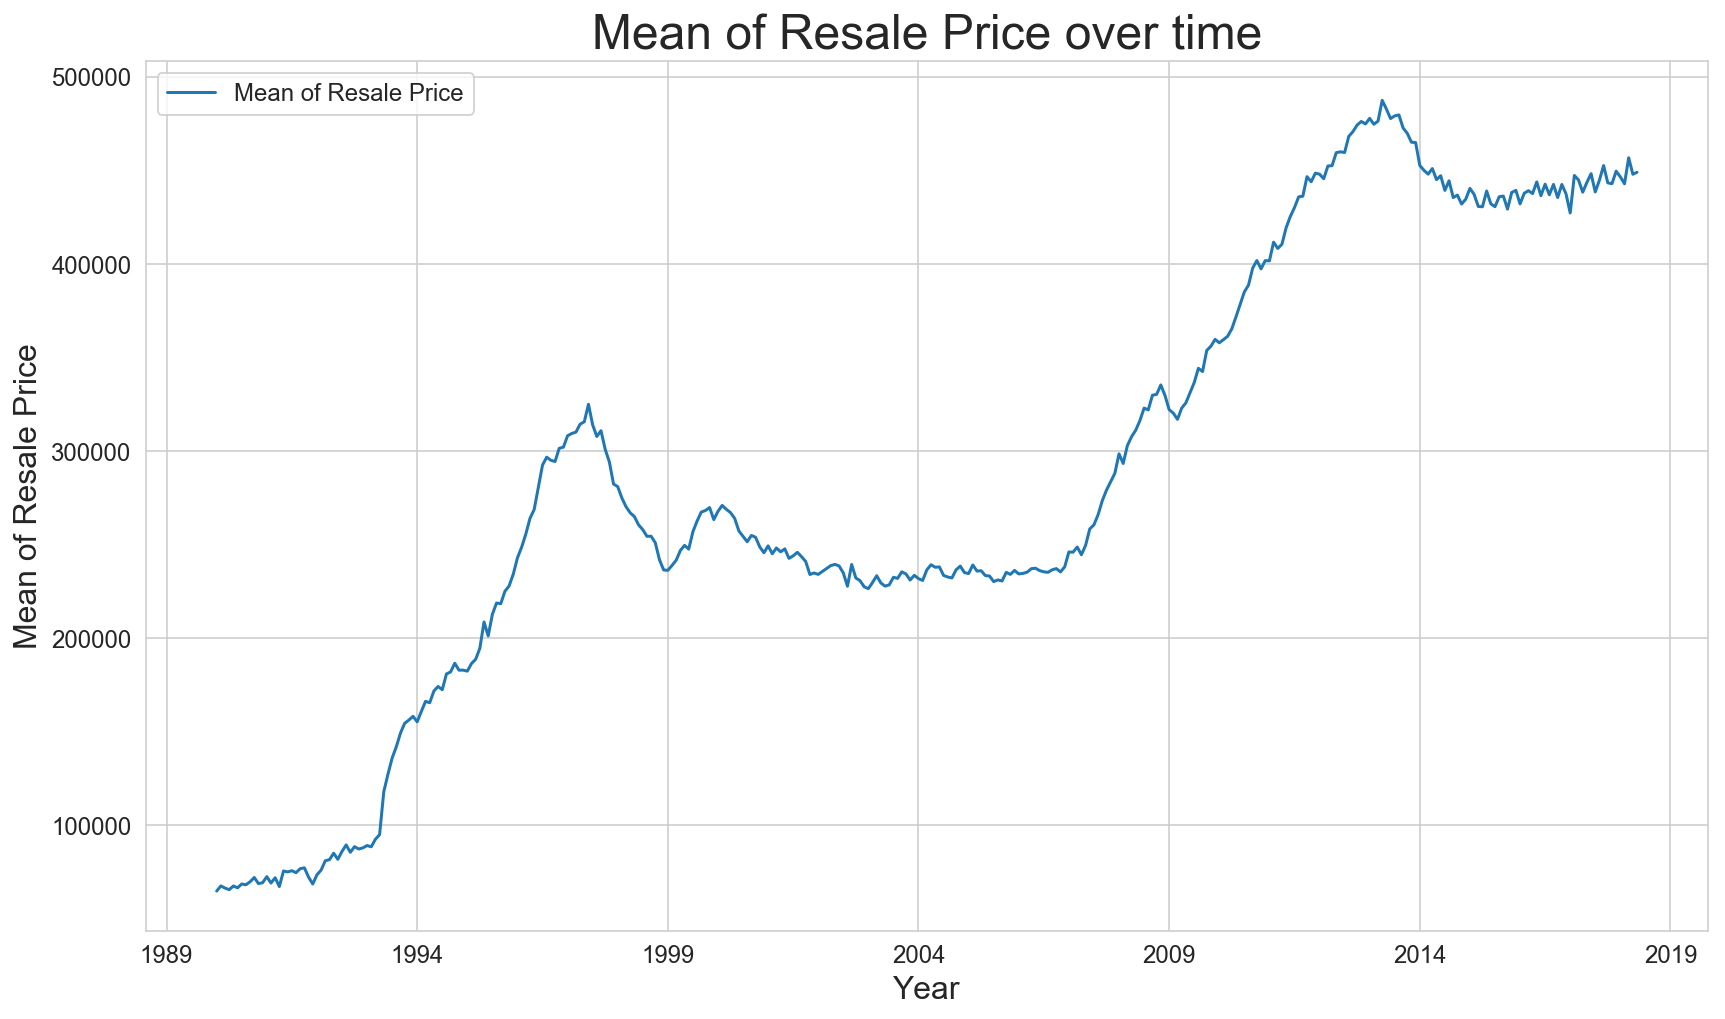

In [133]:
plt.figure(figsize = (14,8))
resale_all.groupby('date').mean()['resale_price'].plot()
# resale_all.groupby('date').min()['var_resale_price'].plot()
# resale_all.groupby('date').max()['var_resale_price'].plot()
plt.title('Mean of Resale Price over time',fontsize=24)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Mean of Resale Price',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Mean of Resale Price'],fontsize = 12)
plt.show()

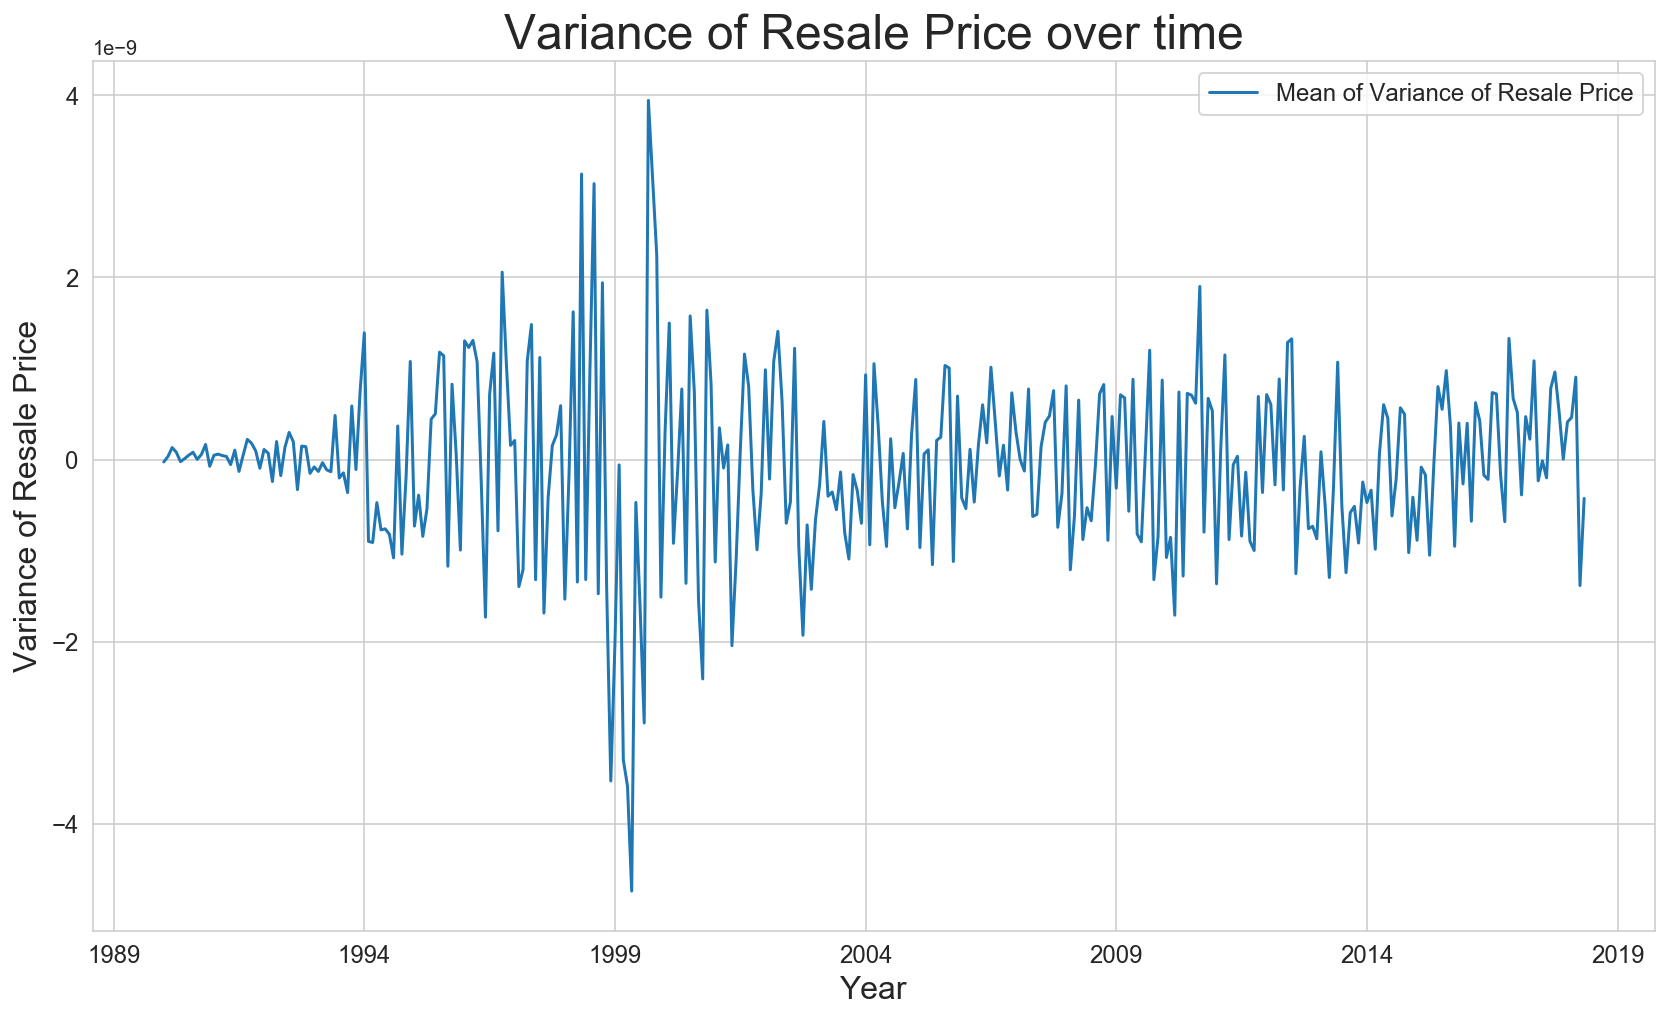

In [112]:
plt.figure(figsize = (14,8))
resale_all.groupby('date').mean()['var_resale_price'].plot()
# resale_all.groupby('date').min()['var_resale_price'].plot()
# resale_all.groupby('date').max()['var_resale_price'].plot()
plt.title('Variance of Resale Price over time',fontsize=24)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Variance of Resale Price',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Mean of Variance of Resale Price'],fontsize = 12)
plt.show()

In [120]:
resale_all.columns

Index(['Unnamed: 0', 'block', 'flat_model', 'flat_type', 'floor_area_sqm',
       'lease_commence_date', 'month', 'remaining_lease', 'resale_price',
       'storey_range', 'street_name', 'town', 'full_address', 'geo_data',
       'latitude', 'longitude', 'formatted_address', 'new full_address',
       'postal_code', 'date', 'mean_resale_price', 'var_resale_price'],
      dtype='object')

In [130]:
pd.options.display.max_columns = 30

In [132]:
resale.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,latitude,longitude,formatted_address,postal_code,date,year,mean_resale_price,var_resale_price,calculated_remaining_lease,block_num,flat_model_PREMIUM,flat_model_IMPROVED,flat_model_MODEL_A,storey
0,216,NEW GENERATION,3 ROOM,73.0,1976,2,NaN,200000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO,1.366208,103.841417,"216 Ang Mo Kio Ave 1, Block 216, Singapore 560216",560216.0,2005-02-01,2005,239146.119171,-39146.119171,70,216,0,0,0,4
1,216,NEW GENERATION,3 ROOM,73.0,1976,2,NaN,170000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO,1.366208,103.841417,"216 Ang Mo Kio Ave 1, Block 216, Singapore 560216",560216.0,2005-02-01,2005,239146.119171,-69146.119171,70,216,0,0,0,10
2,232,NEW GENERATION,3 ROOM,67.0,1977,2,NaN,230000.0,04 TO 06,ANG MO KIO AVE 3,ANG MO KIO,1.368210,103.837250,"232 Ang Mo Kio Ave 3, Block 232, Singapore 560232",560232.0,2005-02-01,2005,239146.119171,-9146.119171,71,232,0,0,0,4
3,220,NEW GENERATION,3 ROOM,67.0,1977,2,NaN,200000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO,1.365628,103.840420,"220 Ang Mo Kio Ave 1, Block 220, Singapore 560220",560220.0,2005-02-01,2005,239146.119171,-39146.119171,71,220,0,0,0,7
4,230,NEW GENERATION,3 ROOM,67.0,1978,2,NaN,170000.0,04 TO 06,ANG MO KIO AVE 3,ANG MO KIO,1.368866,103.837884,"230 Ang Mo Kio Ave 3, Block 230, Singapore 560230",560230.0,2005-02-01,2005,239146.119171,-69146.119171,72,230,0,0,0,4


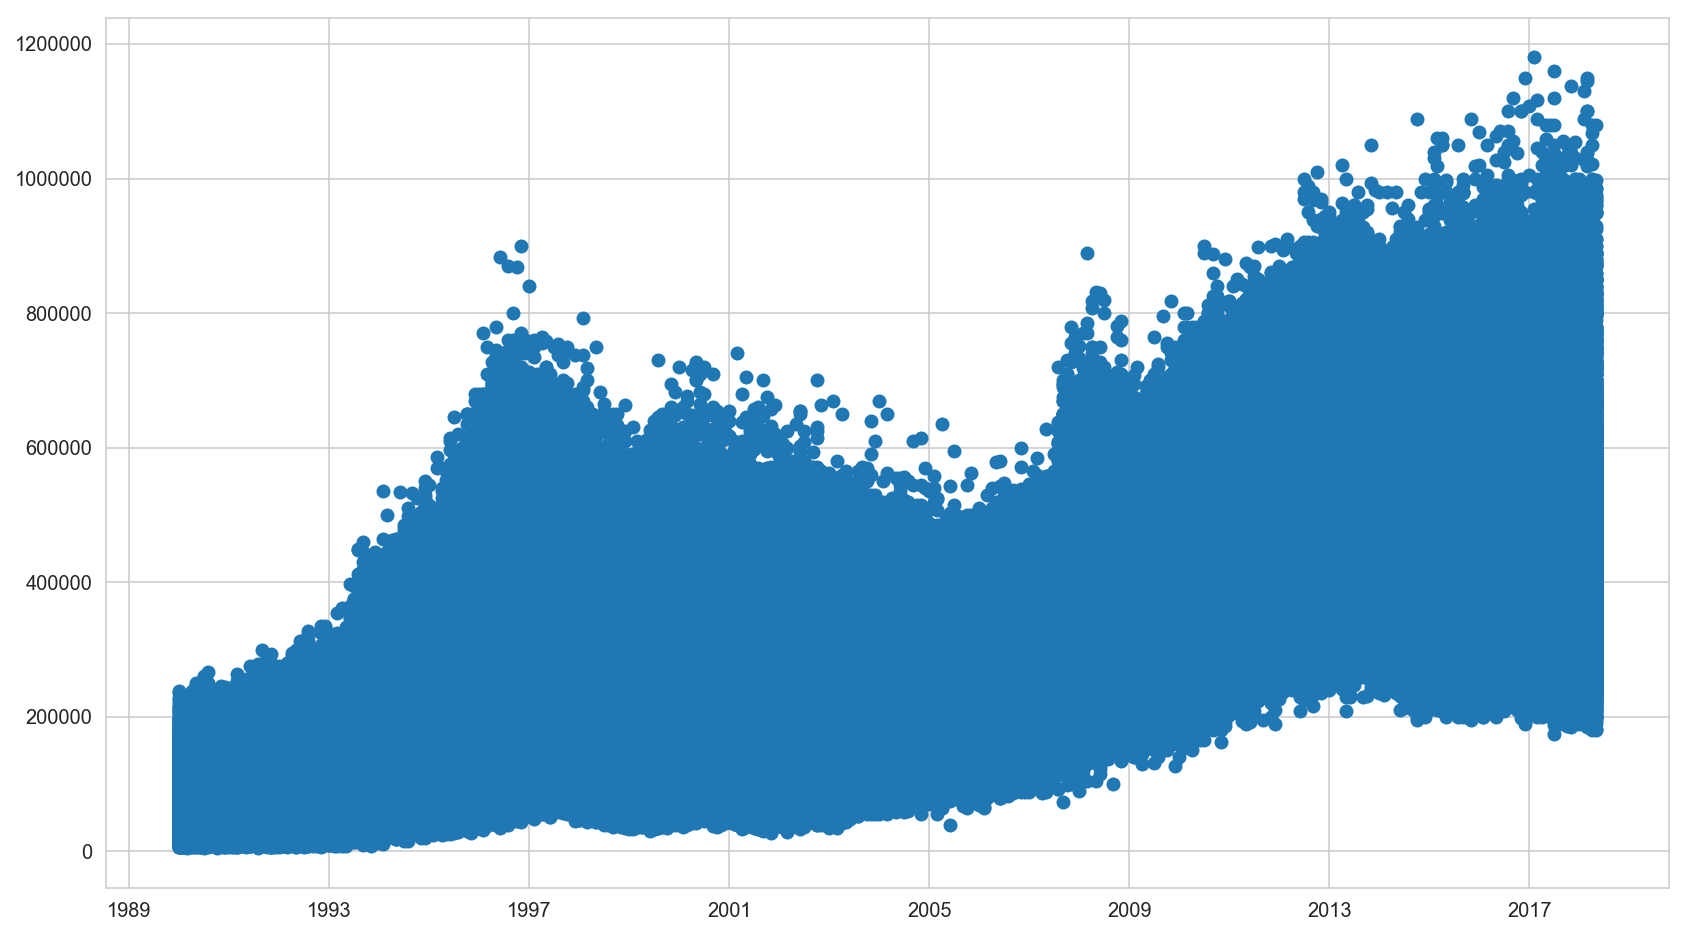

In [114]:
plt.figure(figsize = (14,8))
plt.scatter(resale_all.set_index('date')[['resale_price']].index,resale_all.set_index('date')[['resale_price']])

### EDA on Number of Resales 

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(resale.groupby('date').count()['resale_price'])
# plt.plot(resale.groupby('date').max()['resale_price'])
plt.axvline(x = datetime.strptime('2012-03-01','%Y-%m-%d'),color='r')

plt.title('No. of Resales across time \n(before 2012, based on approval date, after 2012, based on registration date)',fontsize=12);

In [ ]:
resale['date'].dtype

In [ ]:
resale1995 = resale[resale['date'] <= datetime.strptime('1995-01-01','%Y-%m-%d')]

resale2000 = resale[(resale['date'] > datetime.strptime('1995-01-01','%Y-%m-%d')) & 
                    (resale['date'] <= datetime.strptime('2000-01-01','%Y-%m-%d'))]

resale2005 = resale[(resale['date'] > datetime.strptime('2000-01-01','%Y-%m-%d')) & 
                    (resale['date'] <= datetime.strptime('2005-01-01','%Y-%m-%d'))]

resale2010 = resale[(resale['date'] > datetime.strptime('2005-01-01','%Y-%m-%d')) & 
                    (resale['date'] <= datetime.strptime('2010-01-01','%Y-%m-%d'))]

resale2018 = resale[(resale['date'] > datetime.strptime('2010-01-01','%Y-%m-%d'))]

# resale['date'] = pd.to_datetime(resale['month'])
mrt['Opening_date'] = pd.to_datetime(mrt['Opening_date'])

In [ ]:
mrt[mrt['Opening_date']=='TBA']

In [ ]:
def coord_plotter(df,col,mrt_df,title):
    
    plt.figure(figsize=(10,5))
    points = plt.scatter(df['longitude'],df['latitude'],
                         c= df[col],cmap="rainbow")
    plt.colorbar(points)
    plt.scatter(mrt_df['longitude'],mrt_df['latitude'],c='k')
    
    plt.xlim(xmin= 103.63 , xmax=104.01)
    plt.ylim(ymin= 1.25, ymax=1.475)

    plt.title('{} by coordinates {}'.format(col,title))
    plt.legend(('{} at a coordinate'.format(col),'Position of MRT/LRT'))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

In [ ]:
mrt_df = mrt[mrt['Opening_date']<= datetime.strptime('1995-01-01','%Y-%m-%d')]
df = resale1995.groupby(['latitude','longitude']).mean()[['resale_price']].reset_index()
coord_plotter(df,'resale_price',mrt_df,'before 1995')

mrt_df = mrt[(mrt['Opening_date']<= datetime.strptime('2000-01-01','%Y-%m-%d'))]
df = resale2000.groupby(['latitude','longitude']).mean()[['resale_price']].reset_index()
coord_plotter(df,'resale_price',mrt_df,'from 1995 to 2000')

mrt_df = mrt[(mrt['Opening_date']<= datetime.strptime('2005-01-01','%Y-%m-%d'))]
df = resale2005.groupby(['latitude','longitude']).mean()[['resale_price']].reset_index()
coord_plotter(df,'resale_price',mrt_df,'from 2000 to 2005')

mrt_df = mrt[(mrt['Opening_date']<= datetime.strptime('2010-01-01','%Y-%m-%d'))]
df = resale2010.groupby(['latitude','longitude']).mean()[['resale_price']].reset_index()
coord_plotter(df,'resale_price',mrt_df,'from 2005 to 2010')

mrt_df = mrt[(mrt['Opening_date']<= datetime.strptime('2019-01-01','%Y-%m-%d'))]
df = resale2018.groupby(['latitude','longitude']).mean()[['resale_price']].reset_index()
coord_plotter(df,'resale_price',mrt_df,'from 2010 onwards')

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(12,5))
sns.violinplot(resale['lease_commence_date'],ax=ax1)
plt.title('Distribution of no of resales over time')
sns.violinplot(resale['year'],ax=ax2)

In [ ]:
price_time = resale.groupby(['date']).mean()[['resale_price']]
price_time['year'] = price_time.index.year.astype(int)
price_time['adj_price'] = [price*change for p_year,price in zip(price_time['year'],price_time['resale_price']) 
                                        for [year,change] in inflate 
                                        if p_year == year]
price_time.reset_index(inplace=True)
print price_time.shape
price_time.head()

In [ ]:
resale.head()

In [ ]:
resale.head()

In [ ]:
resale = resale.merge(price_time,on='date')
resale['var_resale_price'] = resale['resale_price'] - resale['resale_price_px']
resale['var_adj_price'] = resale['adj_price'] - resale['adj_price_px']

In [ ]:
resale.groupby('date').mean()['var_resale_price']

In [ ]:
plt.figure(figsize=(8,4))

plt.plot(resale.groupby('date').max()['resale_price'])
plt.plot(resale.groupby('date').mean()['resale_price'])
plt.plot(resale.groupby('date').min()['resale_price'])
plt.plot(price_time['adj_price'])

plt.legend(('Maximum Resale Price','Average Resale Price','Minimum Resale Price'))
plt.title('Resale Prices Over Time',fontsize = 16)
plt.xlabel('Year of resale approval/registration')
plt.ylabel('Price($)');